<h1>Sustainable Energy Transitions</h1>
<div>A project by <a href="http://www.ssgouridis.org" target="_blank" >Sgouris Sgouridis</a> and <a href="http://www.csaladen.es" target="_blank" >Dénes Csala</a> at <a  href="http://www.masdar.ac.ae" target="_blank">Masdar Institute of Science and Technology</a></div>
<h2><br>Data pre-processing notebook</h2>

This workbook will guide you through the mining, processing, formatting and saving the input data for the <a target="_blank" href="http://set.csaladen.es/set2.html">SET 2.0</a> model.

<p>This is document has been created using  <a target="_blank" href="http://ipython.org/">IPython Notebook</a> in the <a target="_blank" href="https://store.continuum.io/cshop/anaconda/">Anaconda</a> distribution and it can be edited and run in <i>active</i> mode by clicking download in top right corner of this page. The code is partitioned into sections, called <i>cells</i>. When you are using this workbook in <i>active</i> mode, double-click on a cell to edit it and then run using <code>Ctrl + Enter</code>. Hitting <code>Shift + Enter</code> runs the code and steps into the next cell, while <code>Alt + Enter</code> runs the code and adds a new, empty cell. If you are running this notebook on a presonal computer, you will need a machine with at least <i>1GB</i> of memory (<i>2GB</i> recommended) and a processor of <i>1GHz</i>.
<h2>Data</h2>
<p>The major data sources for this work are the <a href="http://www.eia.gov/beta/international/data/browser/#?ord=SA&cy=2012&v=H&vo=0&so=0&io=0&start=1980&end=2012&vs=INTL.44-1-AFRC-QBTU.A~INTL.44-1-ASOC-QBTU.A~INTL.44-1-CSAM-QBTU.A~INTL.44-1-EURA-QBTU.A~INTL.44-1-EURO-QBTU.A~INTL.44-1-MIDE-QBTU.A~INTL.44-1-NOAM-QBTU.A" target="_blank">EIA</a>, <a href="http://www.bp.com/en/global/corporate/about-bp/energy-economics/energy-outlook.html" target="_blank">BP</a> and <a href="http://data.worldbank.org/" target="_blank">World Bank</a> open databases. Other minor data sources will be referenced further in the document, where relevant.
</p>
<h2>Processing</h2>
<p>The data processing has been done using the <a target="_blank" href="https://store.continuum.io/cshop/anaconda/">Anaconda</a> distribution of <a target="_blank" href="https://www.python.org/">Python 2.7</a> using the <i>IPython Notebook</i> editor. The <i>EIA</i> database is accessed using the open-scource <a target="_blank" href="https://github.com/kennethreitz/requests">requests</a> <i>Python</i> library and the data is loaded into a <a target="_blank" href="http://pandas.pydata.org/">pandas</a> dataframe, which represents the backbone of the data analysis. The <i>BP</i> data comes as an aggregated <i>Excel .xls</i> file, therefore it can be directly loaded into <i>pandas</i>. The World Bank data comes in the form of <i>zipped csv</i> files and the are unzipped using the <i>requests</i> and <a target="_blank" href="https://docs.python.org/2/library/zipfile.html">zipfile</a> libraries. Numerical processing is done with <a target="_blank" href="http://www.numpy.org/">NumPy</a>. Please make sure you have all of these compoents set up in your <i>Python</i> installation.
</p>

<h1>Code</h1>

Import dependencies.

In [1]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np
%matplotlib inline

Set up save path on your local computer.

In [3]:
savepath="E:\Skydrive\GitHub\set\plots"

# Country and region name converters

In the first part of the analysis, the data for all countries is loaded and processed, not just for the <i>World</i>. Therefore we need to create converters between database country names.

In [4]:
#country name converters

#EIA->pop
clist1={'North America':'Northern America',
'United States':'United States of America',
'Central & South America':'Latin America and the Caribbean',
'Bahamas, The':'Bahamas',
'Saint Vincent/Grenadines':'Saint Vincent and the Grenadines',
'Venezuela':'Venezuela (Bolivarian Republic of)',
'Macedonia':'The former Yugoslav Republic of Macedonia',
'Moldova':'Republic of Moldova',
'Russia':'Russian Federation',
'Iran':'Iran (Islamic Republic of)',
'Palestinian Territories':'State of Palestine',
'Syria':'Syrian Arab Republic',
'Yemen':'Yemen ',
'Congo (Brazzaville)':'Congo',
'Congo (Kinshasa)':'Democratic Republic of the Congo',
'Cote dIvoire (IvoryCoast)':"C\xc3\xb4te d'Ivoire",
'Gambia, The':'Gambia',
'Libya':'Libyan Arab Jamahiriya',
'Reunion':'R\xc3\xa9union',
'Somalia':'Somalia ',
'Sudan and South Sudan':'Sudan',
'Tanzania':'United Republic of Tanzania',
'Brunei':'Brunei Darussalam',
'Burma (Myanmar)':'Myanmar',
'Hong Kong':'China, Hong Kong Special Administrative Region',
'Korea, North':"Democratic People's Republic of Korea",
'Korea, South':'Republic of Korea',
'Laos':"Lao People's Democratic Republic",
'Macau':'China, Macao Special Administrative Region',
'Timor-Leste (East Timor)':'Timor-Leste',
'Virgin Islands,  U.S.':'United States Virgin Islands',
'Vietnam':'Viet Nam'}

#BP->pop
clist2={u'                 European Union #':u'Europe',
u'Rep. of Congo (Brazzaville)':u'Congo (Brazzaville)',
'Republic of Ireland':'Ireland',
'China Hong Kong SAR':'China, Hong Kong Special Administrative Region',
u'Total Africa':u'Africa',
u'Total North America':u'Northern America',
u'Total S. & Cent. America':'Latin America and the Caribbean',
u'Total World':u'World',
u'Total World ':u'World',
'South Korea':'Republic of Korea',
u'Trinidad & Tobago':u'Trinidad and Tobago',
u'US':u'United States of America'}

#WD->pop
clist3={u"Cote d'Ivoire":"C\xc3\xb4te d'Ivoire",
u'Congo, Rep.':u'Congo (Brazzaville)',
u'Caribbean small states':'Carribean',
u'East Asia & Pacific (all income levels)':'Eastern Asia',
u'Egypt, Arab Rep.':'Egypt',
u'European Union':u'Europe',
u'Hong Kong SAR, China':u'China, Hong Kong Special Administrative Region',
u'Iran, Islamic Rep.':u'Iran (Islamic Republic of)',
u'Kyrgyz Republic':u'Kyrgyzstan',
u'Korea, Rep.':u'Republic of Korea',
u'Latin America & Caribbean (all income levels)':'Latin America and the Caribbean',
u'Macedonia, FYR':u'The former Yugoslav Republic of Macedonia',
u'Korea, Dem. Rep.':u"Democratic People's Republic of Korea",
u'South Asia':u'Southern Asia',
u'Sub-Saharan Africa (all income levels)':u'Sub-Saharan Africa',
u'Slovak Republic':u'Slovakia',
u'Venezuela, RB':u'Venezuela (Bolivarian Republic of)',
u'Yemen, Rep.':u'Yemen ',
u'Congo, Dem. Rep.':u'Democratic Republic of the Congo'}

def cnc(country):
    if country in clist1: return clist1[country]
    elif country in clist2: return clist2[country]
    elif country in clist3: return clist3[country]
    else: return country

# Population

Consult the notebook entitled <i>pop.ipynb</i> for the details of mining the data from the UN statistics division online database.  
Due to being the reference database for country names cell, the cell below needs to be run first, before any other databases.

 <a href="http://nbviewer.ipython.org/url/set.csaladen.es/pop.ipynb" target="_blank">Population processing notebook</a> | output: <a target="_blank" href="https://dl.dropboxusercontent.com/u/333992592/Set/db/pop.csv">pop.csv</a>

In [5]:
#population data
pop=pd.read_csv('https://dl.dropboxusercontent.com/u/333992592/Set/db/pop.csv').set_index(['Country','Year']).unstack(level=1)
pop.head()

Value                                                          \
Year           1950    1951    1952    1953    1954    1955    1956    1957   
Country                                                                       
Afghanistan    7451    7547    7651    7763    7882    8010    8146    8290   
Africa       228827  233364  238148  243180  248460  253988  259762  265780   
Albania        1214    1243    1276    1311    1350    1390    1433    1477   
Algeria        8872    9059    9253    9459    9680    9917   10170   10436   
Angola         4148    4220    4297    4378    4460    4543    4626    4709   

                              ...                                         \
Year           1958    1959   ...        2091     2092     2093     2094   
Country                       ...                                          
Afghanistan    8443    8604   ...       61322    61112    60897    60676   
Africa       272039  278537   ...     3933881  3963991  3993557  4022570   
Albania        1523    1570   ...        2329     2314     2299     2285   
Algeria       10713   10995   ...       55613    55561    55501    55433   
Angola         4793    4878   ...       91993    92654    93297    93924   

                                                                   
Year            2095     2096     2097     2098     2099     2100  
Country                                                            
Afghanistan    60449    60218    59982    59741    59497    59249  
Africa       4051019  4078898  4106198  4132914  4159041  4184577  
Albania         2272     2260     2248     2237     2226     2217  
Algeria        55357    55275    55186    55091    54992    54887  
Angola         94534    95127    95704    96264    96809    97337  

[5 rows x 151 columns]

# Define database parsers and units

Carefully set database path variable at the bottom of this cell:
-  0: direct online database access - the database API might havechanged over time so it might not work
-  1: working mirror on Dropbox of database files <a target="_blank" href="https://dl.dropboxusercontent.com/u/333992592/Set/db/index.html">here</a> (recommended).
-  2: local path, use this if you have downloaded all necessary files and are doing local testing

In [7]:
#initialize data and constants
data={}
countries={i for i in pop.index}
years={int(i[1]) for i in pop.columns}
dbs={'bp','eia'}
datatypes={'prod','cons','emi','res'}
allfuels=['oil','coal','gas','nuclear','biofuels','hydro','geo_other','solar','wind']
fossils=['oil','coal','gas']+['nrg','nrg_sum']
transp=1 #transparency
colorlist=np.array([[166,86,40,transp*255],[153,153,153,transp*255],[152,78,163,transp*255],[228,26,28,transp*255],[247,129,191,transp*255],[55,126,184,transp*255],[255,127,0,transp*255],[255,255,51,transp*255],[77,175,74,transp*255]])/255.0
gcolors={allfuels[i]:colorlist[i] for i in range(len(allfuels))}

def reset(what='all',datatype='all'):
    global data
    if what=='all':
        #reset all values of database
        fuels=allfuels+['nrg','nrg_sum']
        data={i:{int(k[1]):{'energy':{j:{k:{l:np.NaN for l in dbs} for k in datatypes}\
                              for j in fuels},'population':long(pop.loc[i][k])*1000,\
                                              'consumer_efficiency':0.5,\
                                              'cumulative_emissions':0}\
                              for k in pop.columns}\
                              #we use population as the default database for country names
                              for i in pop.index} 
    else:
        for i in countries:
            for j in years:
                if datatype=='all':
                    data[i][j]['energy'][what]={k:{l:np.NaN for l in dbs} for k in datatypes}
                else:
                    data[i][j]['energy'][what][datatype]={l:np.NaN for l in dbs}

reset()

kbpd_to_TWh=365.25*0.001628200 #unit conversion from thousand barrels of oil per day to TWh per year
Gboe_to_TWh=1628.2 #unit conversion from thousand million barrels of oil to TWh
EJ_to_TWh=277.77 #unit conversion from exa Joule to TWh
bcf_to_TWh=0.2931 #unit conversion from billion cubic feet of natural gas to TWh
tcf_to_TWh=bcf_to_TWh*1000.0 #unit conversion from trillion cubic feet of natural gas to TWh
qbtu_to_TWh=293.297222 #unit conversion from quadrillion British thermal units to TWh
mtoe_to_TWh=11.63 #unit conversion million metric tons of oil equivalent to TWh
Mtoe_to_TWh=11.63 #unit conversion million metric tons of oil equivalent to TWh
Gtoe_to_TWh=11.63*1000 #unit conversion million metric tons of oil equivalent to TWh
cm_to_cf=35.3 #unit converstion from million cubic meters to million cubic feet
tcm_to_TWh=tcf_to_TWh*cm_to_cf #unit conversion from trillion cubic meters of natural gas to TWh
t_to_st=1.10231 #unit conversion from metric ton to short ton
tcoe_to_toe=1.42857 #unit conversion from metric tons of coal equivalent to metric tons of oil equivalent
mtcoe_to_TWh=tcoe_to_toe*mtoe_to_TWh #unit conversion million metric tons of coal equivalent to TWh
mstcoe_to_TWh=mtcoe_to_TWh*t_to_st #unit conversion million metric short tons of coal equivalent to TWh

carbon_budget=840*44/12 #840 GtC + conversion from C to CO2, as per http://www.ipcc.ch/report/ar5/wg1/#.Ukv6moash8E

path = 1 #set database path
#online path = 0
#backup path = 1
#local path  = 2

## EIA

Due to being the reference database for country names cell, the cell below needs to be run first, before any other energy databases.

In [8]:
#EIA
def eia_parse(url,fuel,datatype,unitconverter,end,additive=False):
    eia=pd.read_excel(url)
    eia=eia.drop(eia.index[:1]).T.set_index([1]).T
    eia.columns=['Country','Drop']+range(end+1-len(eia.columns)+2,end+1)
    eia=eia.drop('Drop',axis=1).drop(eia.index[:1]).set_index('Country')
    
    #save data
    global data
    for country in eia.index:
        if cnc(country) in data:
            for year in set(eia.columns):
                if eia.loc[country][year]=='--': number = np.NaN
                else: number=eia.loc[country][year]
                try: 
                    if additive: data[cnc(country)][year]['energy'][fuel][datatype]['eia']+=number*unitconverter
                    else: data[cnc(country)][year]['energy'][fuel][datatype]['eia']=number*unitconverter
                except: pass
            if country+' (Offshore)' in eia.index:
                for year in set(eia.columns):
                    if eia.loc[country+' (Offshore)'][year]=='--': number = np.NaN
                    else: number=eia.loc[country+' (Offshore)'][year]
                    try: data[cnc(country)][year]['energy'][fuel][datatype]['eia']+=number*unitconverter
                    except: pass

## BP

Make sure you set the local path correctly, if you have set the variable <i>path</i> equal to 2.

In [10]:
#BP
def bp_parse(sheet,fuel,datatype,unitconverter,end,additive=False):
    if path==0: url='http://www.bp.com/content/dam/bp/excel/Energy-Economics/statistical-review-2014/BP-Statistical_Review_of_world_energy_2014_workbook.xlsx'
    elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/BP-Statistical_Review_of_world_energy_2014_workbook.xlsx'
    else: url='E:/Dropbox (MIT)/Public/Set/db/BP-Statistical_Review_of_world_energy_2014_workbook.xlsx'
    bp=pd.read_excel(url,sheetname=sheet)
    bp=bp.drop(bp.index[:1]).T.set_index([1]).T
    bp.columns=['Country']+range(end+1-len(bp.columns)+3,end+1)+['Drop1','Drop2']
    bp=bp.drop('Drop1',axis=1).drop('Drop2',axis=1).drop(bp.index[:1]).set_index('Country').dropna(axis=0, how='all')
    
    #save data
    global data
    for country in bp.index:
        if cnc(country) in data:
            for year in set(bp.columns):
                if bp.loc[country][year]==u'n/a': number = np.NaN
                else: number=bp.loc[country][year]
                try: 
                    if additive: data[cnc(country)][year]['energy'][fuel][datatype]['bp']+=number*unitconverter
                    else: data[cnc(country)][year]['energy'][fuel][datatype]['bp']=number*unitconverter
                except: pass

## AVG (Average)

Artificial variable to create average of two databases, treated from this point forward as a database of its own. There are two flavors of it, <i>AVG</i> and <i>NAVG</i>. The former only includes years where both databses have entries while the latter takes as valid also the years where only one database features a value.

In [12]:
#AVG
def avg_parse(fuel,datatype):
    for country in data:
        for year in data[country]:
            if not np.isnan(data[country][year]['energy'][fuel][datatype].values()).any():
                data[country][year]['energy'][fuel][datatype]['avg']=np.mean(data[country][year]['energy'][fuel][datatype].values())
            else: data[country][year]['energy'][fuel][datatype]['avg']=np.NaN

#NAVG - average ignoring nans - just take the average of whatever data is available
def navg_parse(fuel,datatype):
    for country in data:
        for year in data[country]:
            if not np.isnan(data[country][year]['energy'][fuel][datatype].values()).all():
                data[country][year]['energy'][fuel][datatype]['navg']=np.nanmean(data[country][year]['energy'][fuel][datatype].values())
            else: data[country][year]['energy'][fuel][datatype]['navg']=np.NaN

## Global

Define main data parser function.

In [13]:
def parse(url,sheet,fuel,datatype,units,end,additive=False,onlyaverage=0): #onlyaverage 0=all, 1=only data, 2=only average
    if not additive: 
        if onlyaverage!=2:
            reset(fuel,datatype)
    if onlyaverage!=2:
        if url!='none':
            eia_parse(url,fuel,datatype,units['eia'],end['eia'],additive)
        if sheet!='none':
            bp_parse(sheet,fuel,datatype,units['bp'],end['bp'],additive)
    if onlyaverage!=1:
        avg_parse(fuel,datatype)
        navg_parse(fuel,datatype)

# Define plotters and getters

Define shortcut function for quick plotting and getting database data streams.

In [14]:
def subplotter(country,fuel,db,datatype,ax):
    try:
        ax.plot(subgetter(country,fuel,db,datatype)['x'],subgetter(country,fuel,db,datatype)['y'],label=db+' '+datatype,linewidth=2)
    except: print 'ERROR plotting', country, fuel, db, datatype

def fracplotter(country,fuel,db,top,down,ax):
    try:
        ax.plot(fracgetter(country,fuel,db,top,down)['x'],\
            fracgetter(country,fuel,db,top,down)['y'],label=db+' '+top+'/'+down,linewidth=2,linestyle='--')
    except: print 'ERROR plotting', country, fuel, db, top+'/'+down
        
def plotter(country,fuel,db='avg',limits=[1965,2015]):
    fig, ax = plt.subplots(1,3,subplot_kw=dict(axisbg='#EEEEEE'),figsize=(17,4))
    for i in range(3): ax[i].grid(color='white', linestyle='solid')
    
    if fuel=='population': 
        subplotter(country,fuel,'un','population',ax[0])
        ax[0].set_ylabel('million',labelpad=14)
        ax[0].set_xlim(limits)
    elif fuel=='cumulative_emissions': 
        subplotter(country,fuel,'cumulative','emissions',ax[0])
        ax[0].plot(limits,np.ones(len(limits))*carbon_budget,'r--',label='carbon budget')
        ax[0].set_ylabel('GtCO2',labelpad=14)
        ax[0].set_xlim(limits)
    else: 
        ax[0].set_ylabel('TWh',labelpad=-60)
        if fuel in fossils:
            ax[1].set_ylabel('TWh',labelpad=-70)
            ax[2].set_ylabel('MtCO2',labelpad=-60)
            ax1=ax[1].twinx()
            ax2=ax[2].twinx()
        for i in range(3): ax[i].set_xlim(limits)
        if db=='all': db=dbs | {'avg'}
        if type(db)==str: db={db}
        for i in db:
            subplotter(country,fuel,i,'cons',ax[0])
            subplotter(country,fuel,i,'prod',ax[0])
            if fuel in fossils:
                subplotter(country,fuel,i,'res',ax[1])
                subplotter(country,fuel,i,'emi',ax[2])
                #plot extraction ratio
                fracplotter(country,fuel,i,'prod','res',ax1)
                #plot carbon intensity
                fracplotter(country,fuel,i,'emi','cons',ax2)
                
    for i in range(3): ax[i].legend(loc=2,framealpha=0.8)
    ax[0].set_title(fuel)
    if fuel in fossils:
        ax1.legend(loc=4,framealpha=0.8)
        ax2.legend(loc=4,framealpha=0.8)
        ax1.set_ylabel('fraction',labelpad=-50)
        ax2.set_ylabel('kgCO2/kWh primary',labelpad=-45)
    plt.show()
    
def subgetter(country,fuel,db,datatype):
    try:
        if fuel=='population':
            x=np.sort(list(years))
            y=[data[country][i]['population']/1000000.0 for i in x]
        elif fuel=='cumulative_emissions':
            x=np.sort(list(years))
            y=[data[country][i]['cumulative_emissions']/1000.0 for i in x]
        else:
            x=[i for i in np.sort(list(years)) if not np.isnan(data[country][i]['energy'][fuel][datatype][db])]
            y=[data[country][i]['energy'][fuel][datatype][db] for i in x]
        return {'x':x,'y':y}
    except: print 'ERROR getting', country, fuel, db, datatype

def fracgetter(country,fuel,db,top,down):
    try:
        a=subgetter(country,fuel,db,top)['x']
        b=subgetter(country,fuel,db,down)['x']
        c=np.intersect1d(a,b)
        d=np.searchsorted(a,c)
        e=np.searchsorted(b,c)
        x=a[d[0]:d[::-1][0]+1]
        y=np.array(subgetter(country,fuel,db,top)['y'][d[0]:d[::-1][0]+1])/\
          np.array(subgetter(country,fuel,db,down)['y'][e[0]:e[::-1][0]+1])
        return {'x':x,'y':y}
    except: print 'ERROR getting', country, fuel, db, top+'/'+down
        
def getter(country,fuel,db='avg'):
    if fuel=='population': 
        return subgetter(country,fuel,'un','population')
    elif fuel=='cumulative_emissions': 
        return subgetter(country,fuel,'cumulative','emissions')
    else: 
        if db=='all': db=dbs | {'avg'}
        if type(db)==str: db={db}
        aux={}
        for i in db:
            aux[i]={}
            for datatype in {'cons','prod','emi','res'}:
                aux[i][datatype]=subgetter(country,fuel,i,datatype)
        return aux

Test plotter on population data.

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


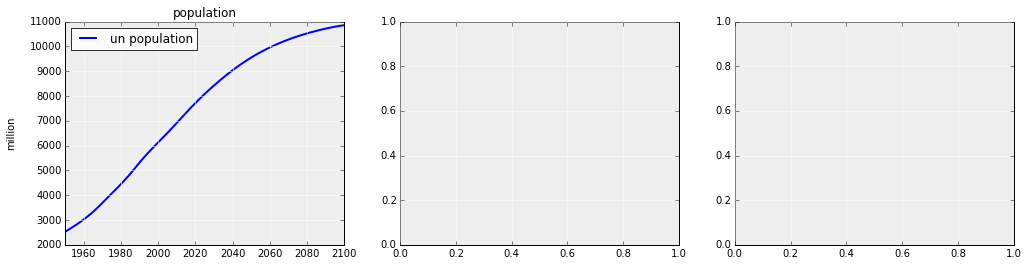

In [15]:
plotter('World','population',limits=[1950,2100])

# Parse primary energy production and consumption data

Primary energy is energy extracted from the primary source. That could be the amount of energy of oil extracted from the ground or the amount of potential energy of the water. Combustible energy sources (fossils+biofuels) are all primary energy sources, as well as renewables and nuclear electricity.

The typical energy stages that we consider here are:

| Primary  | Secondary  | Tertiary  | Quaternary  |
|---|---|---|---|
| Energy from primary (direct) sources  | Energy input for Electricity/Heat/Motion generation | Energy output of Electricity/Heat/Motion generation | Electricity/Heat/Motion delivered  |

It is assumed that energy can only stored in primary form (e.g. oil or water potential, etc.). Therefore at the primary energy stage, we will report both production and consumption data, but at later stages, we only report consumption values. (! keep in mind that renewable electricity is both a primary and a secondary source)

# Fossils

## Oil

Set up local paths again, if you need it.

In [16]:
#parse data

fuel='oil'
units={'bp':kbpd_to_TWh,'eia':kbpd_to_TWh}
end={'bp':2013,'eia':2013}

#oil prod
if path==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=5&pid=53&pdid=53,55,57,58,59,56,54,62,63,64,65,66,67,68&aid=1&cid=regions&syid=1980&eyid=2013&form=&defaultid=3&typeOfUnit=STDUNIT&unit=TBPD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/Total_Oil_Supply_(Thousand_Barrels_Per_Day).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/Total_Oil_Supply_(Thousand_Barrels_Per_Day).xls'
sheet=u'Oil Production – Barrels'
parse(url,sheet,fuel,'prod',units,end)

#oil cons
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=5&pid=5&pdid=5,62,63,64,65,66,67,68&aid=2&cid=regions&syid=1980&eyid=2013&form=&defaultid=3&typeOfUnit=STDUNIT&unit=TBPD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/Total_Petroleum_Consumption_(Thousand_Barrels_Per_Day).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/Total_Petroleum_Consumption_(Thousand_Barrels_Per_Day).xls'
sheet=u'Oil Consumption – Barrels'
parse(url,sheet,fuel,'cons',units,end)

#oil res
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=5&pid=57&pdid=57&aid=6&cid=regions&syid=1980&eyid=2014&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BB&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/Crude_Oil_Proved_Reserves_(Billion_Barrels).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/Crude_Oil_Proved_Reserves_(Billion_Barrels).xls'
units={'bp':Gboe_to_TWh,'eia':Gboe_to_TWh} #redefine units
end={'bp':2013,'eia':2014}
sheet=u'Oil - Proved reserves history'
parse(url,sheet,fuel,'res',units,end)

#oil emi
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=5&pid=5&pdid=5&aid=8&cid=regions&syid=1980&eyid=2013&form=&defaultid=3&typeOfUnit=STDUNIT&unit=MMTCD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/CO2_Emissions_from_the_Consumption_of_Petroleum_(Million_Metric_Tons).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/CO2_Emissions_from_the_Consumption_of_Petroleum_(Million_Metric_Tons).xls'
units={'bp':3.07*kbpd_to_TWh/mtoe_to_TWh,'eia':1} #redefine units
end={'bp':2013,'eia':2013}
sheet=u'Oil Consumption – Barrels'
parse(url,sheet,fuel,'emi',units,end)

The oil consumption and production, reserves and emissions are parsed for all countries for the available years (tyipically 1965 - 2013) and converted to the main energy units of the workboo, TWh. Here the <i>World</i> data is featured, but this can be called for all countries.

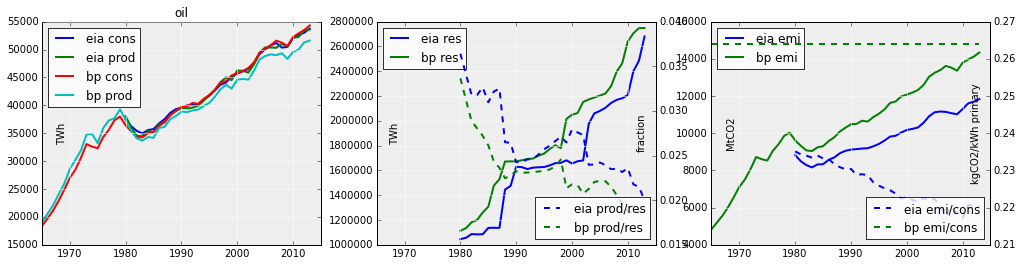

In [21]:
plotter('World','oil',dbs) #change 'avg' to 'bp', 'eia', 'all' or any set such as {'bp','avg'}. default is 'avg'. dbs={'bp','eia'}

##Natural gas

In [18]:
fuel='gas'
units={'bp':bcf_to_TWh*365.25,'eia':bcf_to_TWh}
end={'bp':2013,'eia':2013}

#gas prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=3&pid=26&pdid=3,43,48,24,26&aid=1&cid=regions&syid=1980&eyid=2013&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BCF&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/Dry_Natural_Gas_Production_(Billion_Cubic_Feet).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/Dry_Natural_Gas_Production_(Billion_Cubic_Feet).xls'
sheet=u'Gas Production – Bcf'
parse(url,sheet,fuel,'prod',units,end)

#gas cons
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=3&pid=26&pdid=26&aid=2&cid=regions&syid=1980&eyid=2013&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BCF&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/Dry_Natural_Gas_Consumption_(Billion_Cubic_Feet).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/Dry_Natural_Gas_Consumption_(Billion_Cubic_Feet).xls'
sheet=u'Gas Consumption – Bcf'
parse(url,sheet,fuel,'cons',units,end)

#gas res
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=3&pid=3&pdid=3&aid=6&cid=regions&syid=1980&eyid=2014&form=&defaultid=3&typeOfUnit=STDUNIT&unit=TCF&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/Proved_Reserves_of_Natural_Gas_(Trillion_Cubic_Feet).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/Proved_Reserves_of_Natural_Gas_(Trillion_Cubic_Feet).xls'
units={'bp':tcm_to_TWh,'eia':tcf_to_TWh} #redefine units
end={'bp':2013,'eia':2014}
sheet=u'Gas - Proved reserves history '
parse(url,sheet,fuel,'res',units,end)

#gas emi
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=3&pid=3&pdid=3,51,52&aid=8&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=MMTCD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/C02_Emissions_from_the_Consumption_and_Flaring_of_Natural_Gas_(Million_Metric_Tons).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/C02_Emissions_from_the_Consumption_and_Flaring_of_Natural_Gas_(Million_Metric_Tons).xls'
units={'bp':2.35*bcf_to_TWh*365.25/mtoe_to_TWh,'eia':1} #redefine units
end={'bp':2013,'eia':2012}
sheet=u'Gas Consumption – Bcf'
parse(url,sheet,fuel,'emi',units,end)

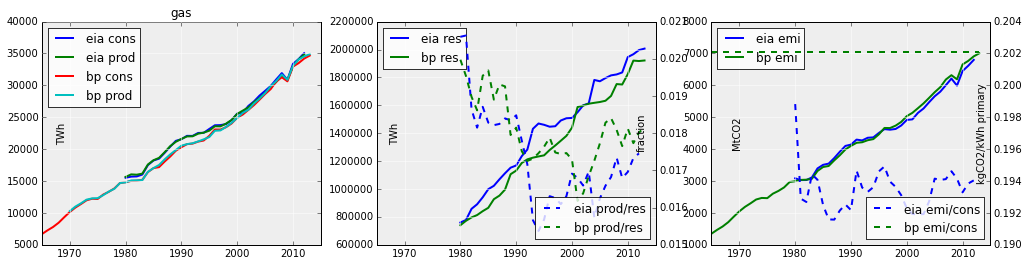

In [19]:
plotter('World','gas',dbs)

## Coal

In [22]:
fuel='coal'
units={'bp':mtoe_to_TWh,'eia':qbtu_to_TWh}
end={'bp':2013,'eia':2012}

#coal prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=1&pid=7&pdid=7,9,11,12,14,17,18,21&aid=1&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=BTUUNIT&unit=QBTU&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/Total_Primary_Coal_Production_(Quadrillion_Btu).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/Total_Primary_Coal_Production_(Quadrillion_Btu).xls'
sheet=u' Coal Production - Mtoe'
parse(url,sheet,fuel,'prod',units,end)

#coal cons
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=1&pid=1&pdid=1&aid=2&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=BTUUNIT&unit=QBTU&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/Total_Coal_Consumption_(Quadrillion_Btu).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/Total_Coal_Consumption_(Quadrillion_Btu).xls'
sheet=u'Coal Consumption -  Mtoe'
parse(url,sheet,fuel,'cons',units,end)

#coal res
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=1&pid=7&pdid=7,9,14&aid=6&cid=regions&syid=2011&eyid=2011&form=&defaultid=3&typeOfUnit=STDUNIT&unit=MST&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/Total_Recoverable_Coal_(Million_Short_Tons).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/Total_Recoverable_Coal_(Million_Short_Tons).xls'
units={'bp':mtcoe_to_TWh,'eia':mstcoe_to_TWh} #redefine units
end={'bp':2013,'eia':2011}
sheet=u'Coal - Reserves'
parse(url,sheet,fuel,'res',units,end,False,1) #don't calculte averages yet, fix db first
#fix bp data for 2011-2012
for i in data.keys():
    for j in range(2011,2013):
        try:
            data[i][j]['energy'][fuel]['res']['bp']=np.NaN
        except: pass
parse(url,sheet,fuel,'res',units,end,False,2) #recalculate averages - last parameter is only average

#coal emi
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=1&pid=1&pdid=1&aid=8&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=MMTCD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/CO2_Emissions_from_the_Consumption_of_Coal_(Million_Metric_Tons).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/CO2_Emissions_from_the_Consumption_of_Coal_(Million_Metric_Tons).xls'
units={'bp':3.96*1,'eia':1} #redefine units
end={'bp':2013,'eia':2012}
sheet=u'Coal Consumption -  Mtoe'
#bp does not report direct emissions values, just consumption + carbon content
parse(url,sheet,fuel,'emi',units,end)

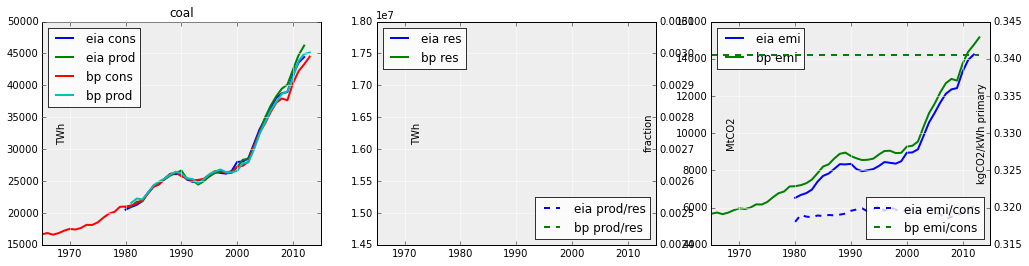

In [23]:
plotter('World','coal',dbs)

# Biofuels

BP only gives production values.

In [24]:
fuel='biofuels'
units={'bp':mtoe_to_TWh/1000,'eia':kbpd_to_TWh}
end={'bp':2016,'eia':2011}

#biofuels prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=79&pid=79&pdid=79,80,81&aid=1&cid=regions&syid=2000&eyid=2011&form=&defaultid=3&typeOfUnit=STDUNIT&unit=TBPD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/Total_Biofuels_Production_(Thousand_Barrels_Per_Day).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/Total_Biofuels_Production_(Thousand_Barrels_Per_Day).xls'
sheet=u'Biofuels Production - Ktoe'
parse(url,sheet,fuel,'prod',units,end)

#biofuels cons
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=79&pid=79&pdid=79,80,81&aid=2&cid=regions&syid=2000&eyid=2011&form=&defaultid=3&typeOfUnit=STDUNIT&unit=TBPD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/Total_Biofuels_Consumption_(Thousand_Barrels_Per_Day).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/Total_Biofuels_Consumption_(Thousand_Barrels_Per_Day).xls'
sheet='none'
parse(url,sheet,fuel,'cons',units,end)

#fix data after 2013
for i in data.keys():
    for j in range(2014,2017):
        try:
            data[i][j]['energy'][fuel]={k:{l:np.NaN for l in (dbs|{'avg','navg'})} for k in datatypes}
        except: pass

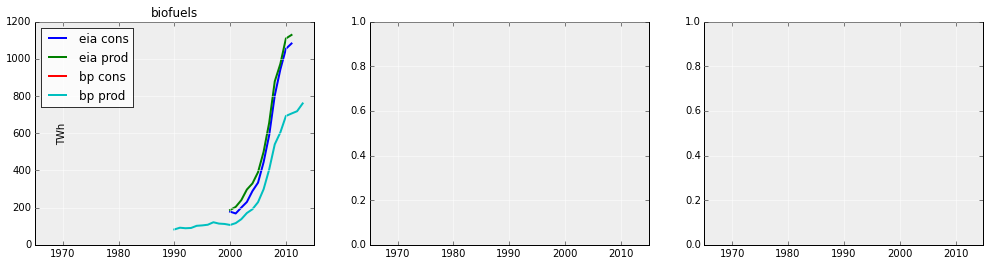

In [25]:
plotter('World','biofuels',dbs)

# Electricity

Currently electricity production = consumption + losses - imports + exports + (storage = 0)  
Since there is no substantial long-term storage and the losses are quasi-constant around 7%, one call to the database is enough.  
EIA only gives generation values, while BP only gives consumption values. Strangely, BP consumption values are higher than EIA generation values.

## Nuclear

In [26]:
fuel='nuclear'
units={'bp':1,'eia':1}
end={'bp':2013,'eia':2012}

#nuclear prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=2&pid=27&pdid=&aid=12&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/Nuclear_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/Nuclear_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
sheet='none'
parse(url,sheet,fuel,'prod',units,end)

#nuclear cons
url='none'
sheet=u'Nuclear Consumption - TWh'
parse(url,sheet,fuel,'cons',units,end)

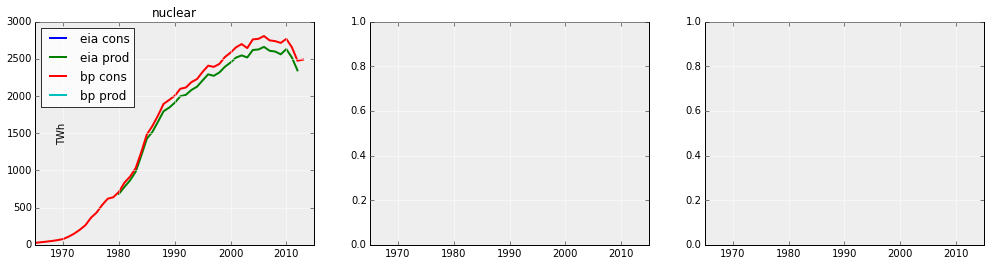

In [27]:
plotter('World','nuclear',dbs)

## Hydropower

In [28]:
fuel='hydro'
units={'bp':1,'eia':1}
end={'bp':2013,'eia':2012}

#hydro prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=2&pid=33&pdid=&aid=12&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/Hydroelectricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/Hydroelectricity_Net_Generation_(Billion_Kilowatthours).xls'
sheet='none'
parse(url,sheet,fuel,'prod',units,end)

#hydro cons
url='none'
sheet=u'Hydro Consumption - TWh'
parse(url,sheet,fuel,'cons',units,end)

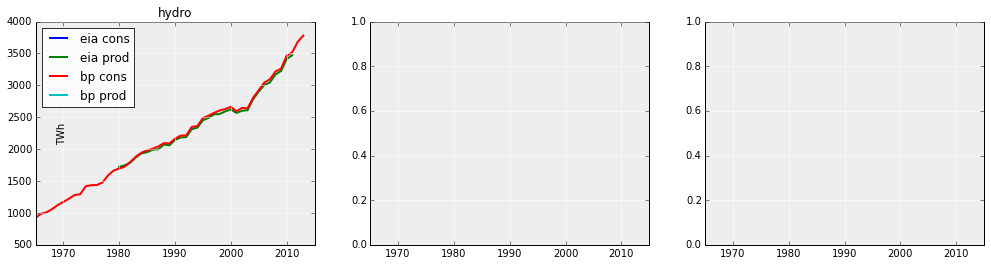

In [29]:
plotter('World','hydro',dbs)

## Solar

In [30]:
fuel='solar'
units={'bp':1,'eia':1}
end={'bp':2013,'eia':2012}

#solar prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=6&pid=116&pdid=29,33,34,35,37,36,38,116,117&aid=12&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/Solar_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/Solar_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
sheet='none'
parse(url,sheet,fuel,'prod',units,end)

#solar cons
url='none'
sheet=u'Solar Consumption - TWh'
parse(url,sheet,fuel,'cons',units,end)

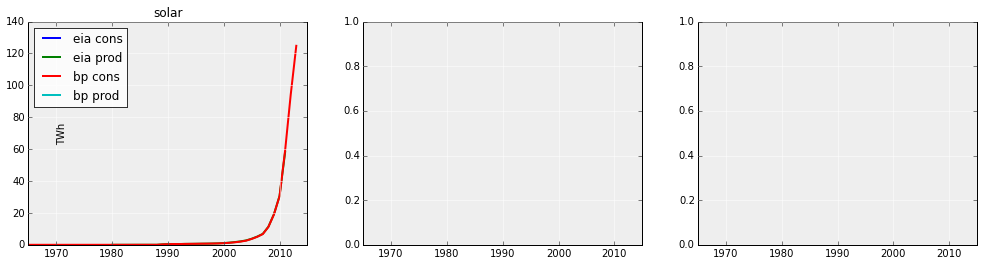

In [31]:
plotter('World','solar',dbs)

## Wind

In [32]:
fuel='wind'
units={'bp':1,'eia':1}
end={'bp':2013,'eia':2012}

#wind prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=6&pid=37&pdid=29,33,34,35,37,36,38,116,117&aid=12&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/Wind_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/Wind_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
sheet='none'
parse(url,sheet,fuel,'prod',units,end)

#wind cons
url='none'
sheet=u'Wind Consumption - TWh '
parse(url,sheet,fuel,'cons',units,end)

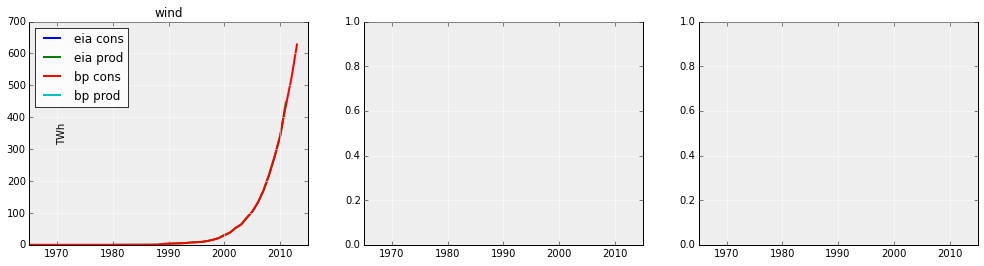

In [33]:
plotter('World','wind',dbs)

## Geothermal + Other

In [34]:
fuel='geo_other'
units={'bp':1,'eia':1}
end={'bp':2013,'eia':2012}

#geo+other prod
#geothermal
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=6&pid=35&pdid=29,33,34,35,37,36,38,116,117&aid=12&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/Geothermal_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/Geothermal_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
eia_parse(url,fuel,'prod',units['eia'],end['eia'])
#biomass+waste
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=6&pid=38&pdid=29,33,34,35,37,36,38,116,117&aid=12&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/Biomass_and_Waste_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/Biomass_and_Waste_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
eia_parse(url,fuel,'prod',units['eia'],end['eia'],True) #set last parameter to True to make operation additive
#tidal+wave
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=6&pid=117&pdid=29,33,34,35,37,36,38,116,117&aid=12&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/Tide_and_Wave_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/Tide_and_Wave_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
eia_parse(url,fuel,'prod',units['eia'],end['eia'],True) #set last parameter to True to make operation additive

url='none'
sheet='none'
parse(url,sheet,fuel,'prod',units,end,True)

#wind cons
url='none'
sheet=u'Geo Biomass Other - TWh'
parse(url,sheet,fuel,'cons',units,end)

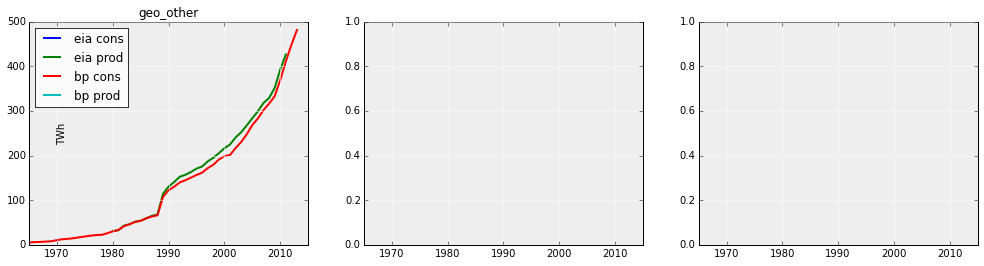

In [29]:
plotter('World','geo_other',dbs)

# Total primary energy

## Sum

Create summed energy category, for comparison.

In [35]:
reset('nrg_sum')
for country in data:
    for year in data[country]:
        for k in {'prod','cons','emi','res'}:
            for j in dbs:
                data[country][year]['energy']['nrg_sum'][k][j]=\
                np.nansum([data[country][year]['energy'][i][k][j] for i in data[country][year]['energy'].keys() if (i not in {'nrg','nrg_sum'})])
                if (data[country][year]['energy']['nrg_sum'][k][j]==0): data[country][year]['energy']['nrg_sum'][k][j]=np.NaN

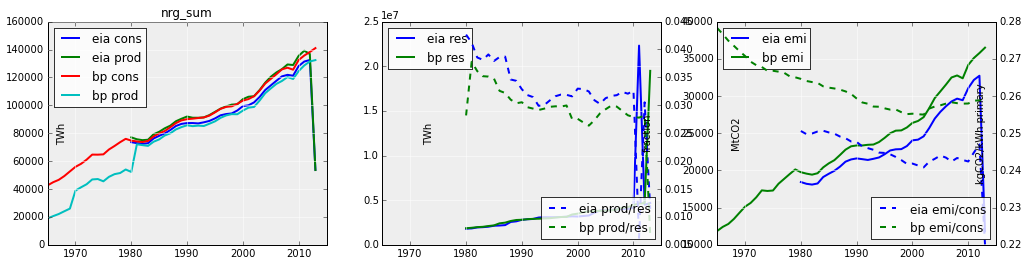

In [36]:
plotter('World','nrg_sum',dbs)

## Direct parse - including biomass

In [37]:
fuel='nrg'
units={'bp':mtoe_to_TWh,'eia':qbtu_to_TWh}
end={'bp':2013,'eia':2012}

#total prod
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=44&pid=44&pdid=44&aid=1&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=BTUUNIT&unit=QBTU&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/Total_Primary_Energy_Production_(Quadrillion_Btu).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/Total_Primary_Energy_Production_(Quadrillion_Btu).xls'
sheet=u'none'
parse(url,sheet,fuel,'prod',units,end)

#total cons
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=44&pid=44&pdid=44,45,46,47&aid=2&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=BTUUNIT&unit=QBTU&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/Total_Primary_Energy_Consumption_(Quadrillion_Btu).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/Total_Primary_Energy_Consumption_(Quadrillion_Btu).xls'
sheet=u'Primary Energy Consumption '
parse(url,sheet,fuel,'cons',units,end)

#total emi
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=90&pid=44&pdid=&aid=8&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=MMTCD&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/_(Million_Metric_Tons).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/_(Million_Metric_Tons).xls'
units={'bp':1,'eia':1} #redefine units
end={'bp':2013,'eia':2012}
sheet=u'Carbon Dioxide Emissions'
parse(url,sheet,fuel,'emi',units,end)

ERROR getting World nrg eia prod/res
ERROR plotting World nrg eia prod/res
ERROR getting World nrg bp prod/res
ERROR plotting World nrg bp prod/res


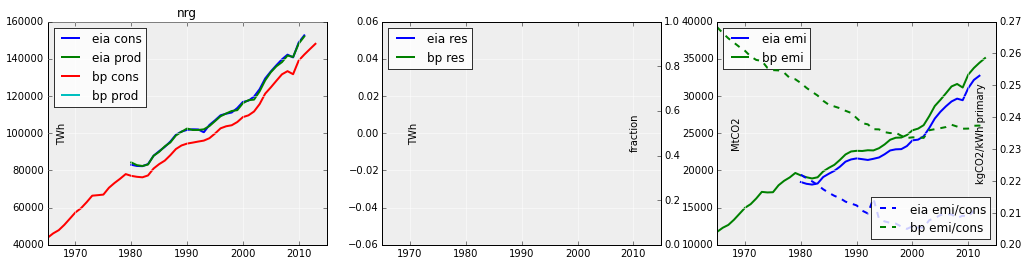

In [38]:
plotter('World','nrg',dbs)

Define composite plotter, <code>stackplotter</code> which plots all parsed energy values for a certian country from a certain database.

In [40]:
from matplotlib.patches import Rectangle
def stackplotter(country,db='navg',datatype='all',fuels='all',limits=[1965,2015]):
    x=np.sort(list(years))
    if datatype!='all':
        fig, ax = plt.subplots(1,1,subplot_kw=dict(axisbg='#EEEEEE'),figsize=(10,6))
        ax.grid(color='white', linestyle='solid')

        if type(fuels)==str: 
            if fuels=='all':fuels=allfuels
            else: fuels=[fuels]
        ind=np.argsort([np.isnan(np.array([data[country][year]['energy'][fuel][datatype][db] for year in x]).T).sum() for fuel in fuels])
        fuels=np.array(fuels)[ind]
        colors=[gcolors[fuel] for fuel in fuels]
        y=np.array([[data[country][year]['energy'][i][datatype][db] for i in fuels] for year in x]).T

        stack_coll=ax.stackplot(x,y,colors=colors)
        proxy_rects = [Rectangle((0, 0), 1, 1, fc=pc.get_facecolor()[0]) for pc in stack_coll][::-1]

        ax.legend(proxy_rects, fuels[::-1],loc=2,framealpha=0)
        if datatype=='emi': ax.set_ylabel('MtCO2',labelpad=10)
        else: ax.set_ylabel('TWh',labelpad=10)
        ax.set_title(db+' '+datatype)
        ax.set_xlim(limits)
    else:
        fig, ax = plt.subplots(1,2,subplot_kw=dict(axisbg='#EEEEEE'),figsize=(17,5))
        datatype=['prod','cons']
        ymax=0
        for k in range(2): 
            ax[k].grid(color='white', linestyle='solid')
        
            if type(fuels)==str: 
                if fuels=='all':fuels=allfuels
                else: fuels=[fuels]
            ind=np.argsort([np.isnan(np.array([data[country][year]['energy'][fuel][datatype[k]][db] for year in x]).T).sum() for fuel in fuels])
            fuels=np.array(fuels)[ind]
            colors=[gcolors[fuel] for fuel in fuels]
            y=np.array([[data[country][year]['energy'][i][datatype[k]][db] for i in fuels] for year in x]).T
            
            stack_coll=ax[k].stackplot(x,y,colors=colors)
            proxy_rects = np.array([Rectangle((0, 0), 1, 1, fc=pc.get_facecolor()[0]) for pc in stack_coll][::-1])

            ax[k].legend(proxy_rects, fuels[::-1],loc=2,framealpha=0.7)
            ax[k].set_ylabel('TWh',labelpad=10)
            ax[k].set_title(db+' '+datatype[k])
            ax[k].set_xlim(limits)
            ymax=max(ymax,ax[k].get_ylim()[1])
        for k in range(2): 
            ax[k].set_ylim([0,ymax])

    plt.show()

Plot all parsed and available data as a stackplot.

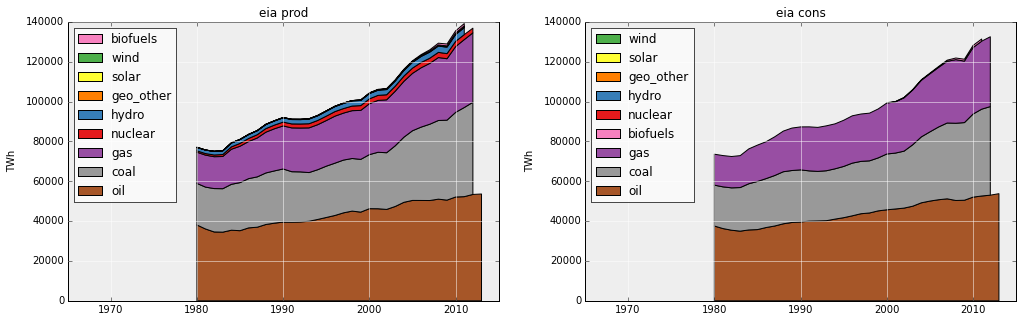

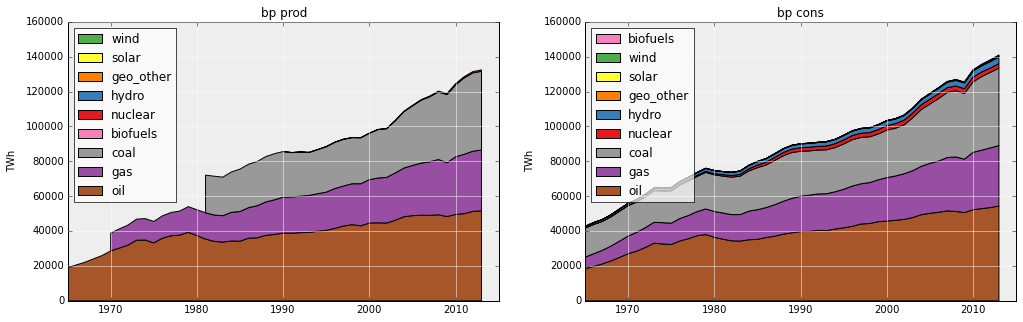

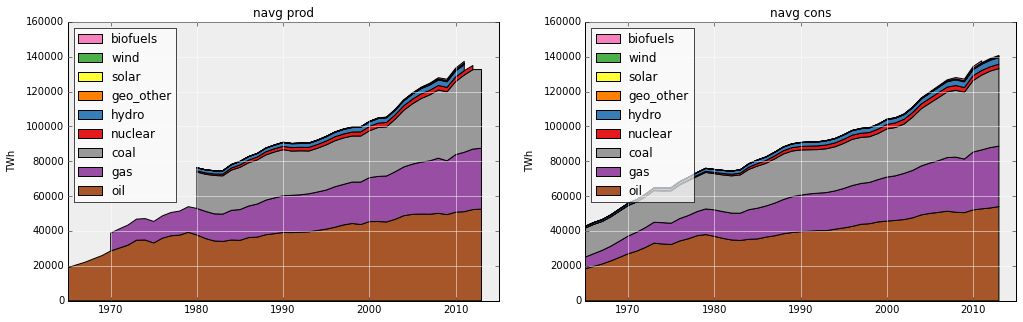

In [41]:
stackplotter('World','eia','all','all')
stackplotter('World','bp','all','all')
stackplotter('World','navg','all','all')

# Transform data

Only World operations from here onwards. Code for individual countries coming soon.

# Extrapolate missing data

Define data interpolator function.

In [46]:
def interpolate(d,years,gfit=2,depth=1,polyorder=1,override=False):
    #depth * length of interpolation substrings will be taken to the left and right
    #for example for {1971:5,1972:6,1973:7,1974:5} interpolating it over 1969-1990
    #for the section 1960-1970 (2 elements) the values from 1972,1973,1974 (3 elements) will be taken with depth 1.5
    #for the section 1974-1990 (15 elements) all values  (4 elements) will be taken to extrapolate
    if (gfit>2): 
        print 'interpolate takes only 1 (polynomial) or 2 (exponential) as 3rd argument [default=2]'
        return
    mydict={}
    missing_points=[[]]
    for year in years:
        if year not in d.keys():
            missing_points[-1].append(year)
        else:
            missing_points.append([])
    for m in missing_points:
        if m:
            fit=gfit
            if ((m[-1]<np.sort(d.keys())[0])|(m[0]>np.sort(d.keys())[-1])): #check if it is ends of the interval, then extrapolate mean only
                if not override: fit=0
            
            if fit==0: #take average
                y = {k: d[k] for k in set(d.keys()).intersection(range(max(min(years),min(m)-int(3)),min(max(years),max(m)+int(3))+1))}
                for i in range(len(m)):
                    mydict[m[i]]=np.mean(y.values())
            elif fit==1:
                #intersector
                y = {k: d[k] for k in set(d.keys()).intersection(range(max(min(years),min(m)-int(depth*len(m))),min(max(years),max(m)+int(depth*len(m)))+1))}
                #print y
                w = np.polyfit(y.keys(),y.values(),polyorder) # obtaining regression parameters
                if (polyorder==1):
                    intersector=w[0]*np.array(m)+w[1]
                else:
                    intersector=w[0]*np.array(m)*np.array(m)+w[1]*np.array(m)+w[2]
                for i in range(len(m)):
                    mydict[m[i]]=max(0,intersector[i])
            else:
                #intersector
                y = {k: d[k] for k in set(d.keys()).intersection(range(max(min(years),min(m)-int(depth*len(m))),min(max(years),max(m)+int(depth*len(m)))+1))}
                #print y
                w = np.polyfit(y.keys(),np.log(y.values()),1) # obtaining log regression parameters (exp fitting)
                intersector=np.exp(w[1])*np.exp(w[0]*np.array(m))
                for i in range(len(m)):
                    mydict[m[i]]=max(0,intersector[i])
    
    #return interpolated points
    return mydict

In [50]:
#update data
#extend data dictionary datatypes with extrapolations as navg2
for country in data:
    for year in data[country]:
        for fuel in data[country][year]['energy']:
            for datatype in data[country][year]['energy'][fuel]:
                if 'navg' in data[country][year]['energy'][fuel][datatype]:
                    data[country][year]['energy'][fuel][datatype]['navg2']=data[country][year]['energy'][fuel][datatype]['navg']
#extrapolate data
#direct extrapolation only valid for World, individual countries have imports and exports, to be addressed later
for country in {'World'}:
    try:
        for fuel in {'oil','coal','gas','nuclear','biofuels','hydro','geo_other','nrg'}: #no need solar and wind, data essentially 0
            db='navg2'
            top='prod'
            down='cons'
            mini=min(subgetter(country,fuel,db,top)['x'][0],subgetter(country,fuel,db,down)['x'][0])
            maxi=max(subgetter(country,fuel,db,top)['x'][::-1][0],subgetter(country,fuel,db,down)['x'][::-1][0])
            helper = {fracgetter(country,fuel,db,top,down)['x'][i]:\
                      fracgetter(country,fuel,db,top,down)['y'][i] \
                      for i in range(len(fracgetter(country,fuel,db,top,down)['x']))}
            hi=interpolate(helper,range(mini,maxi+1),1,3)
            for year in hi:
                if year not in subgetter(country,fuel,db,top)['x']: 
                    data[country][year]['energy'][fuel][top][db]=hi[year]*data[country][year]['energy'][fuel][down][db]
                else: data[country][year]['energy'][fuel][down][db]=hi[year]*data[country][year]['energy'][fuel][top][db]
    except: print country,'not enough data available to extrapolate'

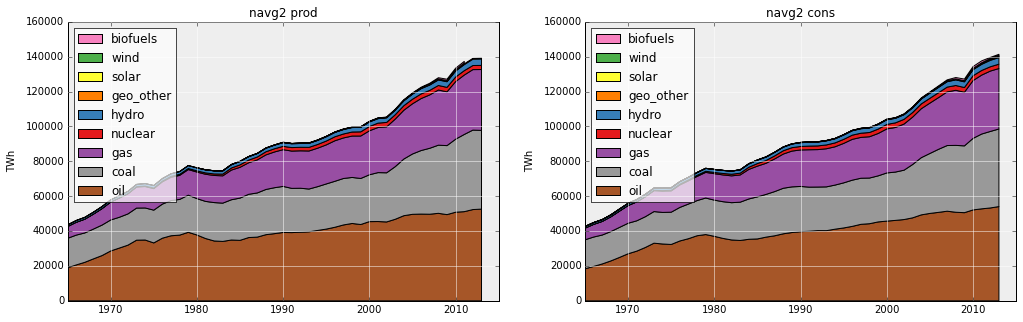

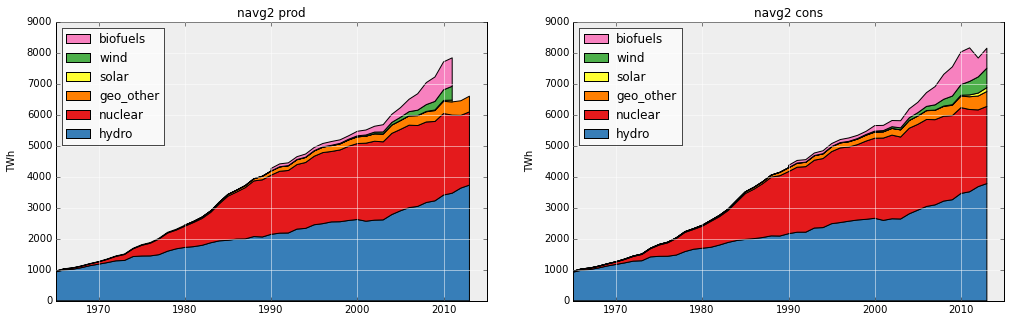

In [49]:
stackplotter('World','navg2','all','all')
stackplotter('World','navg2','all',['hydro','nuclear','geo_other','biofuels','solar','wind'])

## Extrapolate all data for the period 1950-2013

Using exponential growth as default. 

In [51]:
def navg3fcn():
    global data    
    #update data
    #extend data dictionary datatypes with extrapolations as navg3
    for country in data:
        for year in data[country]:
            for fuel in data[country][year]['energy']:
                for datatype in data[country][year]['energy'][fuel]:
                    if 'navg2' in data[country][year]['energy'][fuel][datatype]:
                        data[country][year]['energy'][fuel][datatype]['navg3']=data[country][year]['energy'][fuel][datatype]['navg2']
    #extrapolate data
    #direct extrapolation only valid for World, individual countries have imports and exports, to be addressed later
    for country in {'World'}:
        try:
            for fuel in allfuels+['nrg']:
                db='navg3'
                for datatype in {'prod','cons'}:
                    helper = {subgetter(country,fuel,db,datatype)['x'][i]:\
                              subgetter(country,fuel,db,datatype)['y'][i] \
                              for i in range(len(subgetter(country,fuel,db,datatype)['x']))}
                    start=1950
                    #if fuel in fossils: start=1965 #for fossils we will use Hubbert curves, later
                    hi=interpolate(helper,range(start,2013+1),2,1,1,True) #exponential extrapolation
                    for year in hi:
                        data[country][year]['energy'][fuel][datatype][db]=hi[year]
        except: print country,'not enough data available to extrapolate'
navg3fcn()

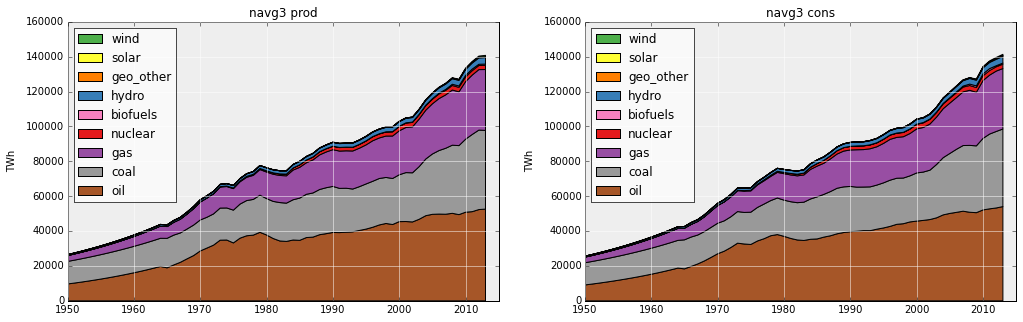

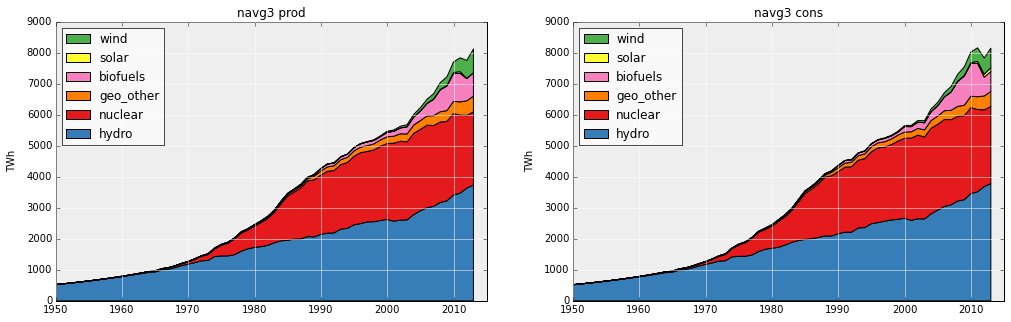

In [52]:
stackplotter('World','navg3','all','all',[1950,2015])
stackplotter('World','navg3','all',['hydro','nuclear','geo_other','biofuels','solar','wind'],[1950,2015])

## Re-estimate fossil data for before 1965 and after 2013 using Hubbert curves

From Mohr, 2015 (http://www.sciencedirect.com/science/article/pii/S0016236114010254  - Table 1 and Table 3 columns BG)

In [53]:
country='World'

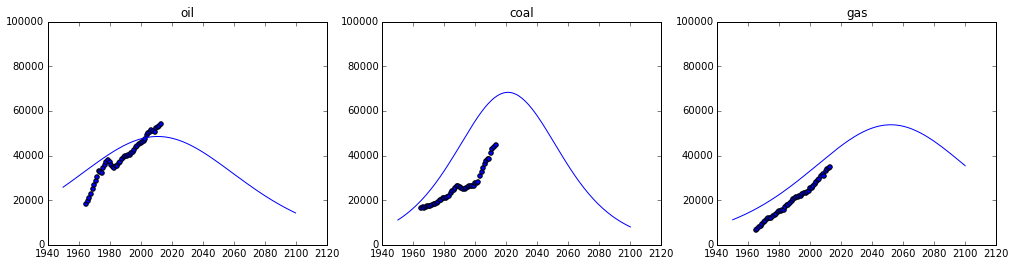

In [54]:
#http://www.sciencedirect.com/science/article/pii/S0016236114010254 - Table 1 and Table 3 columns BG
urr={'coal':22406*EJ_to_TWh,'gas':27810*EJ_to_TWh,'oil':25460*EJ_to_TWh}
peak={'coal':245.9*EJ_to_TWh,'gas':193.6*EJ_to_TWh,'oil':174.7*EJ_to_TWh}
tpeak={'coal':2021,'gas':2052,'oil':2011}
hubbertfuels=['oil','coal','gas']
x=np.arange(1950,2100+1)

#define Hubbert curve
def hubbert(x,peak,tpeak,urr):
    return 2*peak/(1+np.cosh((x-tpeak)*4*peak/urr))

fig,ax=plt.subplots(1,3,figsize=(17,4))
for i,fuel in enumerate(hubbertfuels):
    y=hubbert(x,peak[fuel],tpeak[fuel],urr[fuel])
    ax[i].plot(x,y)
    ax[i].set_title(fuel)
    ax[i].set_ylim([0,100000])
    
    ax[i].scatter(subgetter(country,fuel,'navg','cons')['x'],subgetter(country,fuel,'navg','cons')['y'])
plt.show()

From Cacciola, 2009 (http://www.sciencedirect.com.ezproxy.masdar.ac.ae/science/article/pii/S001623611200230X?np=y - Table 1-3 MHV 2nd column)

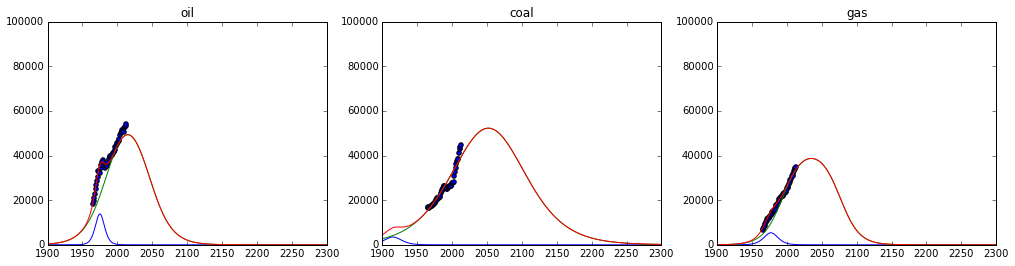

In [55]:
#http://www.sciencedirect.com.ezproxy.masdar.ac.ae/science/article/pii/S001623611200230X?np=y - Table 1-3 MHV 2nd column
urr1={'coal':10*Gtoe_to_TWh,'gas':500*tcf_to_TWh,'oil':150*Gboe_to_TWh}
urr2={'coal':640*Gtoe_to_TWh,'gas':12000*tcf_to_TWh,'oil':2450*Gboe_to_TWh}
peak1={'coal':0.3*Gtoe_to_TWh,'gas':18.4*tcf_to_TWh,'oil':8.5*Gboe_to_TWh}
peak2={'coal':4.1*Gtoe_to_TWh,'gas':73*tcf_to_TWh,'oil':20.7*Gboe_to_TWh}
tpeak1={'coal':1915,'gas':1977,'oil':1975}
tpeak2={'coal':2052,'gas':2035,'oil':2015}
k1={'coal':0.999,'gas':0.999,'oil':0.999}
k2={'coal':0.825,'gas':0.106,'oil':0.366}
hubbertfuels=['oil','coal','gas']
x=np.arange(1900,2301)

#define Hubbert curve
def hubbert(x,peak,tpeak,urr,k):
    scaler=(np.log(1+np.sqrt(1-k**2))-np.log(k))/(np.sqrt(1-k**2))
    return 2*peak/(1+k*np.cosh((x-tpeak)*4*peak*scaler/urr))

fig,ax=plt.subplots(1,3,figsize=(17,4))
for i,fuel in enumerate(hubbertfuels):
    y1=hubbert(x,peak1[fuel],tpeak1[fuel],urr1[fuel],k1[fuel])
    y2=hubbert(x,peak2[fuel],tpeak2[fuel],urr2[fuel],k2[fuel])
    ax[i].plot(x,y1)
    ax[i].plot(x,y2)
    ax[i].plot(x,y1+y2)
    ax[i].set_title(fuel)
    ax[i].set_ylim([0,100000])
    ax[i].set_xlim([1900,2300])
    
    ax[i].scatter(subgetter(country,fuel,'navg','cons')['x'],subgetter(country,fuel,'navg','cons')['y'])
plt.show()

#Combined

Create multi-variant composite Hubbert curves, then readjust it based on our latest available data points.

In [56]:
mycolors=['#980043','#dd1c77','#df65b0']

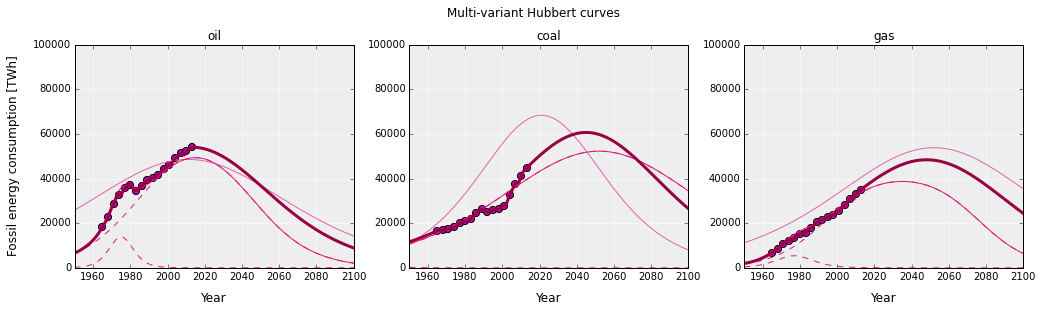

In [58]:
#http://www.sciencedirect.com/science/article/pii/S0016236114010254 - Table 1 and Table 3 column BG
urr={'coal':22406*EJ_to_TWh,'gas':27810*EJ_to_TWh,'oil':25460*EJ_to_TWh}
peak={'coal':245.9*EJ_to_TWh,'gas':193.6*EJ_to_TWh,'oil':174.7*EJ_to_TWh}
tpeak={'coal':2021,'gas':2052,'oil':2011}
#http://www.sciencedirect.com.ezproxy.masdar.ac.ae/science/article/pii/S001623611200230X?np=y - Table 1-3 MHV 2nd column
urr1={'coal':10*Gtoe_to_TWh,'gas':500*tcf_to_TWh,'oil':150*Gboe_to_TWh}
urr2={'coal':640*Gtoe_to_TWh,'gas':12000*tcf_to_TWh,'oil':2450*Gboe_to_TWh}
peak1={'coal':0.3*Gtoe_to_TWh,'gas':18.4*tcf_to_TWh,'oil':8.5*Gboe_to_TWh}
peak2={'coal':4.1*Gtoe_to_TWh,'gas':73*tcf_to_TWh,'oil':20.7*Gboe_to_TWh}
tpeak1={'coal':1915,'gas':1977,'oil':1975}
tpeak2={'coal':2052,'gas':2035,'oil':2015}
k1={'coal':0.999,'gas':0.999,'oil':0.999}
k2={'coal':0.825,'gas':0.106,'oil':0.366}
hubbertfuels=['oil','coal','gas']
x=np.arange(1950,2301)


#define Hubbert curve
def hubbert(x,peak,tpeak,urr,k=0.999):
    scaler=(np.log(1+np.sqrt(1-k**2))-np.log(k))/(np.sqrt(1-k**2))
    return 2*peak/(1+k*np.cosh((x-tpeak)*4*peak*scaler/urr))

fig,ax=plt.subplots(1,3,figsize=(17,4),subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True),)

shift={'oil':0,'gas':5,'coal':9}
scaler1={'oil':1,'gas':1,'coal':1}
scaler2={'oil':1,'gas':1,'coal':1}
Y={'oil':[],'gas':[],'coal':[]}
    
for i,fuel in enumerate(hubbertfuels):
    y=hubbert(x,peak[fuel],tpeak[fuel],urr[fuel])
    z=hubbert(x,(peak2[fuel]+peak[fuel])/2,(tpeak2[fuel]+tpeak[fuel])/2,(urr2[fuel]+urr[fuel])/2,(k2[fuel]+1)/2)
    y1=hubbert(x,peak1[fuel],tpeak1[fuel],urr1[fuel],k1[fuel])
    y2=hubbert(x,peak2[fuel],tpeak2[fuel],urr2[fuel],k2[fuel])
    
    ax[i].grid(color='white', linestyle='solid')
    ax[i].set_xlim(1950,2100)
    ax[i].tick_params(labelsize=10) 
    ax[i].set_xlabel('Year',size=12,labelpad=10)
    ax[i].plot(x,y,color=mycolors[2],linewidth=1)
    ax[i].plot(x,y1,color=mycolors[1],linewidth=1,linestyle='--')
    ax[i].plot(x,y2,color=mycolors[1],linewidth=1,linestyle='--')
    ax[i].plot(x,y1+y2,color=mycolors[1],linewidth=1)
    #ax[i].plot(x,(y1+y2+y)/2,'r--')
    #ax[i].plot(x,z,'k--')
    ax[i].set_title(fuel)
    ax[i].set_ylim([0,100000])    
    ax[i].scatter(subgetter(country,fuel,'navg','cons')['x'][::3],subgetter(country,fuel,'navg','cons')['y'][::3],s=50,c='m')
    
    X=range(1950,1965)+subgetter(country,fuel,'navg','cons')['x']+range(2014,2301)
    
    scaler1[fuel]=subgetter(country,fuel,'navg','cons')['y'][0]/((y1+y2)[15])
    scaler2['oil']=subgetter(country,fuel,'navg','cons')['y'][::-1][0]/((z)[64])
    
    #ax[i].set_xlabel(['front scaler',(int)(scaler1[fuel]*100)/100.0,'rear scaler',(int)(scaler2[fuel]*100)/100.0,'time shift',shift[fuel]])
    #Y=list((y1+y2)[0:15])+subgetter(country,fuel,'navg','cons')['y']+list(((y1+y2+y)/2)[64:351]*scaler)
    Y[fuel]=list((y1+y2)[0:15]*scaler1[fuel])+subgetter(country,fuel,'navg','cons')['y']+list((z)[(64-shift[fuel]):(351-shift[fuel])]*scaler2[fuel])
    ax[i].plot(X,Y[fuel],color=mycolors[0],linewidth=3)

ax[0].set_ylabel('Fossil energy consumption [TWh]',size=12,labelpad=14)
plt.suptitle('Multi-variant Hubbert curves',size=12,y=1.03)    
plt.savefig(savepath+'/hubbert_eq.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

Create cleaner plots.

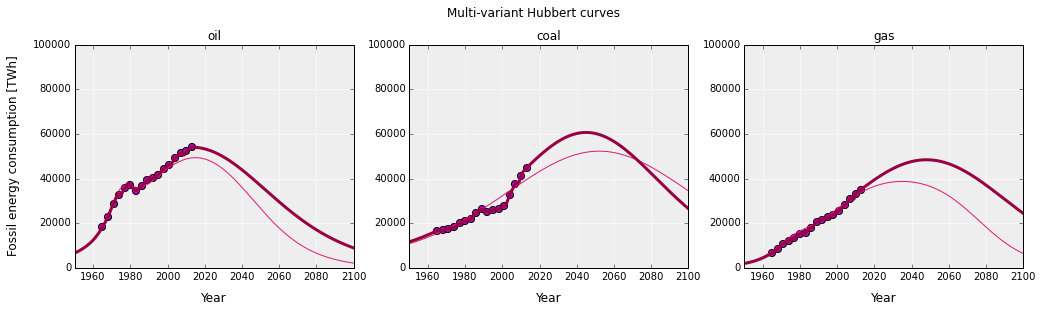

In [59]:
#http://www.sciencedirect.com/science/article/pii/S0016236114010254 - Table 1 and Table 3 column BG
urr={'coal':22406*EJ_to_TWh,'gas':27810*EJ_to_TWh,'oil':25460*EJ_to_TWh}
peak={'coal':245.9*EJ_to_TWh,'gas':193.6*EJ_to_TWh,'oil':174.7*EJ_to_TWh}
tpeak={'coal':2021,'gas':2052,'oil':2011}
#http://www.sciencedirect.com.ezproxy.masdar.ac.ae/science/article/pii/S001623611200230X?np=y - Table 1-3 MHV 2nd column
urr1={'coal':10*Gtoe_to_TWh,'gas':500*tcf_to_TWh,'oil':150*Gboe_to_TWh}
urr2={'coal':640*Gtoe_to_TWh,'gas':12000*tcf_to_TWh,'oil':2450*Gboe_to_TWh}
peak1={'coal':0.3*Gtoe_to_TWh,'gas':18.4*tcf_to_TWh,'oil':8.5*Gboe_to_TWh}
peak2={'coal':4.1*Gtoe_to_TWh,'gas':73*tcf_to_TWh,'oil':20.7*Gboe_to_TWh}
tpeak1={'coal':1915,'gas':1977,'oil':1975}
tpeak2={'coal':2052,'gas':2035,'oil':2015}
k1={'coal':0.999,'gas':0.999,'oil':0.999}
k2={'coal':0.825,'gas':0.106,'oil':0.366}
hubbertfuels=['oil','coal','gas']
x=np.arange(1950,2301)


#define Hubbert curve
def hubbert(x,peak,tpeak,urr,k=0.999):
    scaler=(np.log(1+np.sqrt(1-k**2))-np.log(k))/(np.sqrt(1-k**2))
    return 2*peak/(1+k*np.cosh((x-tpeak)*4*peak*scaler/urr))

fig,ax=plt.subplots(1,3,figsize=(17,4),subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True),)

shift={'oil':0,'gas':5,'coal':9}
scaler1={'oil':1,'gas':1,'coal':1}
scaler2={'oil':1,'gas':1,'coal':1}
Y={'oil':[],'gas':[],'coal':[]}
    
for i,fuel in enumerate(hubbertfuels):
    y=hubbert(x,peak[fuel],tpeak[fuel],urr[fuel])
    z=hubbert(x,(peak2[fuel]+peak[fuel])/2,(tpeak2[fuel]+tpeak[fuel])/2,(urr2[fuel]+urr[fuel])/2,(k2[fuel]+1)/2)
    y1=hubbert(x,peak1[fuel],tpeak1[fuel],urr1[fuel],k1[fuel])
    y2=hubbert(x,peak2[fuel],tpeak2[fuel],urr2[fuel],k2[fuel])
    
    ax[i].grid(color='white', linestyle='solid')
    ax[i].set_xlim(1950,2100)
    ax[i].tick_params(labelsize=10) 
    ax[i].set_xlabel('Year',size=12,labelpad=10)
    #ax[i].plot(x,y,color=mycolors[2],linewidth=1)
    #ax[i].plot(x,y1,color=mycolors[1],linewidth=1,linestyle='--')
    #ax[i].plot(x,y2,color=mycolors[1],linewidth=1,linestyle='--')
    ax[i].plot(x,y1+y2,color=mycolors[1],linewidth=1)
    #ax[i].plot(x,(y1+y2+y)/2,'r--')
    #ax[i].plot(x,z,'k--')
    ax[i].set_title(fuel)
    ax[i].set_ylim([0,100000])    
    ax[i].scatter(subgetter(country,fuel,'navg','cons')['x'][::3],subgetter(country,fuel,'navg','cons')['y'][::3],s=50,c='m')
    
    X=range(1950,1965)+subgetter(country,fuel,'navg','cons')['x']+range(2014,2301)
    
    scaler1[fuel]=subgetter(country,fuel,'navg','cons')['y'][0]/((y1+y2)[15])
    scaler2['oil']=subgetter(country,fuel,'navg','cons')['y'][::-1][0]/((z)[64])
    
    #ax[i].set_xlabel(['front scaler',(int)(scaler1[fuel]*100)/100.0,'rear scaler',(int)(scaler2[fuel]*100)/100.0,'time shift',shift[fuel]])
    #Y=list((y1+y2)[0:15])+subgetter(country,fuel,'navg','cons')['y']+list(((y1+y2+y)/2)[64:351]*scaler)
    Y[fuel]=list((y1+y2)[0:15]*scaler1[fuel])+subgetter(country,fuel,'navg','cons')['y']+list((z)[(64-shift[fuel]):(351-shift[fuel])]*scaler2[fuel])
    ax[i].plot(X,Y[fuel],color=mycolors[0],linewidth=3)

ax[0].set_ylabel('Fossil energy consumption [TWh]',size=12,labelpad=14)
plt.suptitle('Multi-variant Hubbert curves',size=12,y=1.03)    
plt.savefig(savepath+'/hubbert_eq2.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

##Save updated fossil data

In [63]:
for i in range(151):
    for fuel in Y:
        data[country][X[i]]['energy'][fuel]['cons']['navg3']=Y[fuel][i]

Redefine population data.

In [64]:
P=np.array(getter(country,'population')['y'])
D=[940.114512835,
 958.8098467749829,
 979.81898189,
 1003.0307581999789,
 1028.39434484,
 1055.913913299975,
 1085.64441153,
 1117.6834536199708,
 1152.15699857,
 1189.1960381699664,
 1228.8854248,
 1271.2011133099616,
 1315.9488993,
 1362.7232236899574,
 1410.92896022,
 1460.8308580199546,
 1507.1503382,
 1532.709993629977,
 1588.38281507,
 1660.6988618599344,
 1728.1861236,
 1759.244092369972,
 1813.62986539,
 1883.4278760199365,
 1846.14468689,
 1817.9028196900256,
 1881.2036196,
 1916.0035068399684,
 1954.65443111,
 1983.6973579199737,
 1933.03715759,
 1885.3449116800434,
 1843.09507245,
 1828.0239444300137,
 1878.32480799,
 1895.4416280699845,
 1901.97524704,
 1928.1565954799762,
 1959.94078592,
 1964.4960429899959,
 1949.95691748,
 1924.0306041800236,
 1896.22529848,
 1882.040010220013,
 1878.89623776,
 1895.5859164099847,
 1918.10681897,
 1915.4407539500025,
 1899.73277392,
 1913.2913348699876,
 1941.54519524,
 1933.0202970200078,
 1948.19656483,
 1996.2076201999564,
 2063.90768015,
 2099.211671369968,
 2134.08040303,
 2167.7431098599695,
 2164.19876692,
 2123.6877986500367,
 2217.08073152,
 2244.536532339975,
 2250.13314231,
 2252.671516789998,
 2273.7184429628574,
 2294.7653691356954,
 2314.3995993550066,
 2334.008151407272,
 2353.591025292565,
 2373.1482210108147,
 2392.6797385620916,
 2404.168104575153,
 2415.6406100217864,
 2427.0972549019502,
 2436.294379084967,
 2443.1962962962903,
 2450.03477124183,
 2456.8098039215624,
 2463.521394335512,
 2470.169542483654,
 2476.754248366013,
 2476.92816993464,
 2477.0703703703703,
 2475.6255991285416,
 2474.141176470588,
 2472.6171023965157,
 2471.053376906318,
 2469.4500000000016,
 2467.80697167756,
 2466.1242919389992,
 2464.401960784314,
 2460.656263616563,
 2454.872331154684,
 2449.028921568633,
 2443.126034858388,
 2437.1636710239704,
 2431.1418300653595,
 2425.0605119825764,
 2418.9197167755988,
 2412.7194444444503,
 2406.4596949891065,
 2395.189869281056,
 2383.9108932461872,
 2372.6227668845418,
 2361.3254901960786,
 2350.019063180838,
 2338.7034858387797,
 2327.378758169945,
 2316.044880174292,
 2304.701851851862,
 2293.349673202614,
 2281.98834422659,
 2270.617864923747,
 2259.238235294128,
 2247.8494553376904,
 2236.451525054477,
 2225.0444444444443,
 2213.628213507636,
 2202.2028322440087,
 2190.7683006536054,
 2179.3246187363834,
 2167.602251270889,
 2155.873783587509,
 2144.1392156862853,
 2132.398547567175,
 2122.697893972411,
 2115.038779956427,
 2107.375599128547,
 2099.708351488744,
 2092.0370370370442,
 2084.3616557734204,
 2076.682207697901,
 2068.9986928104577,
 2061.3111111111184,
 2055.260014524328,
 2049.205664488023,
 2043.1480610021786,
 2037.087204066817,
 2031.0230936819173,
 2024.9557298475004,
 2018.8851125635442,
 2012.811241830071,
 2009.199825708061,
 2008.052694262891,
 2006.9047494553379,
 2005.7559912854042,
 2004.6064197530866,
 2003.4560348583889,
 2002.304836601307,
 2001.1528249818457,
 2000.0]

Create fossil depletion curves plot.

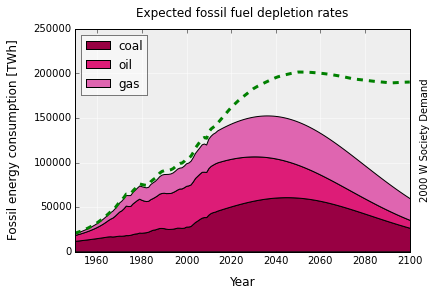

In [65]:
fig, ax = plt.subplots(1,1,subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True),figsize=(6,4))
stack=ax.stackplot(X,[Y[i] for i in Y],colors=mycolors)
ax.grid(color='white', linestyle='solid')
ax.set_xlim(1950,2100)
ax.set_title('Expected fossil fuel depletion rates',size=12,y=1.03)
ax.tick_params(labelsize=10) 
ax.set_xlabel('Year',size=12,labelpad=10)
proxy_rects = [Rectangle((0, 0), 1, 1, fc=pc.get_facecolor()[0]) for pc in stack]
ax.legend(proxy_rects, [i for i in Y],loc=2,framealpha=0.5)
ax.set_ylabel('Fossil energy consumption [TWh]',size=12,labelpad=14)
ax.plot(range(1950,1950+len(D)),[D[i]*P[i]*8760/1000000.0 for i in range(len(D))],'g--',linewidth=3)
ax2=ax.twinx()
ax2.set_yticks([])
ax2.set_ylabel('2000 W Society Demand', labelpad=10)
plt.savefig(savepath+'/hubbert.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

Primary energy part finished.

# Secondary Energy

For secondary energy we need to find out the fossil inputs to electricity, equivalent to a sectorial breakdown of fossil flows. We will do this after defining the generated electricity values, i.e. tertiary energy.

# Demand side

## Population primary energy intensity 1950-2013

In [66]:
for country in {'World'}:
    for year in data[country]:
        for datatype in {'prod','cons'}:
            for db in {'navg3'}:
                data[country][year]['energy']['nrg_sum'][datatype][db]=0
                for fuel in allfuels:
                    data[country][year]['energy']['nrg_sum'][datatype][db]+=data[country][year]['energy'][fuel][datatype][db]

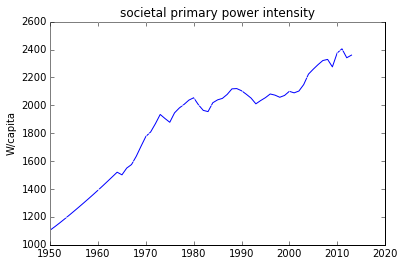

In [67]:
fuel='nrg'
end=2014
plt.grid(color='white', linestyle='solid')
db='navg3'
plt.plot(np.array(subgetter(country,fuel,db,'cons')['x'])[:end-1950],
np.array(subgetter(country,fuel,db,'cons')['y'])[:end-1950]/\
np.array(getter(country,'population')['y'][:end-1950])/8760*1000000)
plt.ylabel('W/capita')
plt.title('societal primary power intensity')
plt.show()

If experiencing problems in the next section, download files and reset path to local (=2).

In [81]:
#path=2

In [167]:
#create energy outlooks
#EIA
if path==0: url='http://www.eia.gov/oiaf/aeo/tablebrowser/aeo_query_server/?event=ehExcel.getFile&study=IEO2013&region=4-0&cases=Reference-d041117&table=15-IEO2013&yearFilter=0'
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/IEO2013-Delivered_energy_consumption_by_end-use_sector_and_fuel-Total_World-Reference_case.xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/IEO2013-Delivered_energy_consumption_by_end-use_sector_and_fuel-Total_World-Reference_case.xls'
df=pd.read_html(url,skiprows=49)[0]
df.columns=['cons']+range(2005,2042)
df=pd.DataFrame(df.drop('cons',axis=1).drop(2041,axis=1).loc[0]).T.astype(float)

#global demand
#EIA 75% growth by 2040
#IEA 37% growth by 2040
#http://www.worldenergyoutlook.org/media/weowebsite/2014/141112_WEO_FactSheets.pdf
#BP 41% by 2035
#http://www.bp.com/content/dam/bp/pdf/Energy-economics/Energy-Outlook/Energy_Outlook_insights_2035.pdf

#hydro, nuclear
#BP +1.8%/yr, +1.9%/yr
#IEA ?,+60%
#EIA 2.0%,2.8%

#biofuels triple
#EIA

#per capita use
#BP +14%

#wind/solar/geo split

In [152]:
#wind
#url='http://www.eia.gov/oiaf/aeo/tablebrowser/aeo_query_server/?event=ehExcel.getFile&study=IEO2013&region=0-0&cases=Reference-d041117&table=34-IEO2013&yearFilter=0'
url='E:/Dropbox (MIT)/Public/Set/db/IEO2013-World_net_wind-powered_electricity_generation_from_central_producers_by_region_and_country-Reference_case.xls'
dw=pd.read_html(url,skiprows=25)[0]
dw.columns=['cons']+range(2005,2042)
dw=pd.DataFrame(dw.drop('cons',axis=1).drop(2041,axis=1).loc[0]).T.astype(float)

In [153]:
#solar
#http://www.eia.gov/oiaf/aeo/tablebrowser/aeo_query_server/?event=ehExcel.getFile&study=IEO2013&region=0-0&cases=Reference-d041117&table=36-IEO2013&yearFilter=0
url='E:/Dropbox (MIT)/Public/Set/db/IEO2013-World_net_solar_electricity_generation_from_central_producers_by_region_and_country-Reference_case.xls'
ds=pd.read_html(url,skiprows=25)[0]
ds.columns=['cons']+range(2005,2042)
ds=pd.DataFrame(ds.drop('cons',axis=1).drop(2041,axis=1).loc[0]).T.astype(float)

In [154]:
#geo
#http://www.eia.gov/oiaf/aeo/tablebrowser/aeo_query_server/?event=ehExcel.getFile&study=IEO2013&region=0-0&cases=Reference-d041117&table=35-IEO2013&yearFilter=0
url='E:/Dropbox (MIT)/Public/Set/db/IEO2013-World_net_geothermal_electricity_generation_from_central_producers_by_region_and_country-Reference_case.xls'
dg=pd.read_html(url,skiprows=25)[0]
dg.columns=['cons']+range(2005,2042)
dg=pd.DataFrame(dg.drop('cons',axis=1).drop(2041,axis=1).loc[0]).T.astype(float)
#other
#http://www.eia.gov/oiaf/aeo/tablebrowser/aeo_query_server/?event=ehExcel.getFile&study=IEO2013&region=0-0&cases=Reference-d041117&table=37-IEO2013&yearFilter=0
url='E:/Dropbox (MIT)/Public/Set/db/IEO2013-World_net_other_renewable_electricity_generation_from_central_producers_by_region_and_country-Reference_case.xls'
do=pd.read_html(url,skiprows=25)[0]
do.columns=['cons']+range(2005,2042)
do=pd.DataFrame(do.drop('cons',axis=1).drop(2041,axis=1).loc[0]).T.astype(float)

#dg=dg.add(do)

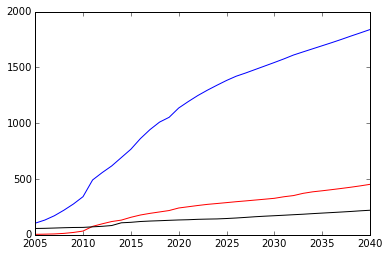

In [156]:
plt.plot(dw.columns,dw.T.values,'b')#wind
plt.plot(ds.columns,ds.T.values,'r')#solar
plt.plot(dg.columns,dg.T.values,'k')#geo_other

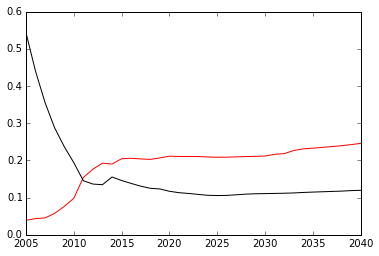

In [157]:
plt.plot(ds.columns,ds.T.values/dw.T.values,'r')#solar normalized to wind
plt.plot(dg.columns,dg.T.values/dw.T.values,'k')#geo_other normalized to wind

In [158]:
#above was generation, now capacities

In [159]:
#wind
#http://www.eia.gov/oiaf/aeo/tablebrowser/aeo_query_server/?event=ehExcel.getFile&study=IEO2013&region=0-0&cases=Reference-d041117&table=23-IEO2013&yearFilter=0
url='E:/Dropbox (MIT)/Public/Set/db/IEO2013-World_installed_wind-powered_generating_capacity_by_region_and_country-Reference_case.xls'
dw2=pd.read_html(url,skiprows=25)[0]
dw2.columns=['cons']+range(2005,2042)
dw2=dw2.drop('cons',axis=1).drop(2041,axis=1).loc[0]

In [160]:
#solar
#http://www.eia.gov/oiaf/aeo/tablebrowser/aeo_query_server/?event=ehExcel.getFile&study=IEO2013&region=0-0&cases=Reference-d041117&table=25-IEO2013&yearFilter=0
url='E:/Dropbox (MIT)/Public/Set/db/IEO2013-World_installed_solar_generating_capacity_by_region_and_country-Reference_case.xls'
ds2=pd.read_html(url,skiprows=25)[0]
ds2.columns=['cons']+range(2005,2042)
ds2=ds2.drop('cons',axis=1).drop(2041,axis=1).loc[0]

In [161]:
#geo
#http://www.eia.gov/oiaf/aeo/tablebrowser/aeo_query_server/?event=ehExcel.getFile&study=IEO2013&region=0-0&cases=Reference-d041117&table=24-IEO2013&yearFilter=0
url='E:/Dropbox (MIT)/Public/Set/db/IEO2013-World_installed_geothermal_generating_capacity_by_region_and_country-Reference_case.xls'
dg2=pd.read_html(url,skiprows=25)[0]
dg2.columns=['cons']+range(2005,2042)
dg2=dg2.drop('cons',axis=1).drop(2041,axis=1).loc[0]

#other
#http://www.eia.gov/oiaf/aeo/tablebrowser/aeo_query_server/?event=ehExcel.getFile&study=IEO2013&region=0-0&cases=Reference-d041117&table=26-IEO2013&yearFilter=0
url='E:/Dropbox (MIT)/Public/Set/db/IEO2013-World_installed_other_renewable_generating_capacity_by_region_and_country-Reference_case.xls'
do2=pd.read_html(url,skiprows=25)[0]
do2.columns=['cons']+range(2005,2042)
do2=do2.drop('cons',axis=1).drop(2041,axis=1).loc[0]

#dg2=dg2.add(do2)

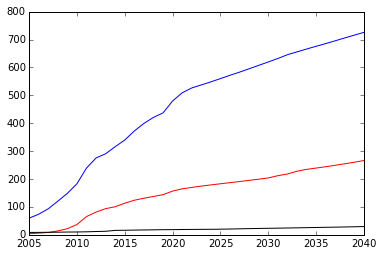

In [162]:
plt.plot(dw2.index,dw2.T.values,'b')#wind
plt.plot(ds2.index,ds2.T.values,'r')#solar
plt.plot(dg2.index,dg2.T.values,'k')#geo_other

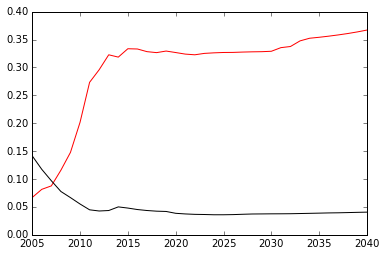

In [163]:
plt.plot(ds2.index,ds2.T.values.astype(float)/dw2.T.values.astype(float),'r')#solar normalized to wind
plt.plot(dg2.index,dg2.T.values.astype(float)/dw2.T.values.astype(float),'k')#geo_other normalized to wind

In [164]:
df=df.values*qbtu_to_TWh

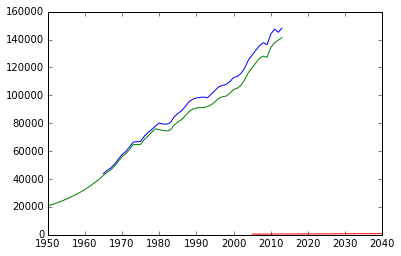

In [168]:
plt.plot(np.array(subgetter(country,'nrg','navg','cons')['x'])[:2014-1950],
np.array(subgetter(country,'nrg','navg','cons')['y'])[:2014-1950])
plt.plot(np.array(subgetter(country,'nrg_sum','navg3','cons')['x'])[:2014-1950],
np.array(subgetter(country,'nrg_sum','navg3','cons')['y'])[:2014-1950])
plt.plot(df.columns,df.T.values)
plt.show()

#SAVE DATA

## AnyLogic inputs

In <a href="http://www.anylogic.com" target="_blank">AnyLogic</a>, the inputs are directly pasted into the model file in the early stages of model creation using the data in the following section. Create exmpty <i>tableFunction</i> variables wit the properties of <i>nearest</i> when out of range and *linear* interpolation, then paste the the following data after clicking on the header of the table function editing area. Since in the following section the data arguments and values areseparated by a <i>TAB</i> character, all of the data should paste automatically into anylogic. After pasting, delete the 0 entry from the table, present by default.

## Fossil Fuels

In [169]:
GAS={}
for i in range(len(X)):
    print X[i],'	',Y['gas'][i]
    GAS[X[i]]=Y['gas'][i]

1950 	1912.31185682
1951 	2076.91482975
1952 	2256.75129927
1953 	2453.24564713
1954 	2667.91746906
1955 	2902.3708082
1956 	3158.27595593
1957 	3437.34172234
1958 	3741.27584142
1959 	4071.73107256
1960 	4430.23469374
1961 	4818.0995903
1962 	5236.3161884
1963 	5685.42623738
1964 	6165.38205394
1965 	6675.39835859
1966 	7264.51399045
1967 	7790.91872588
1968 	8459.2209789
1969 	9320.27391378
1970 	10145.3388163
1971 	10835.5427424
1972 	11387.9991269
1973 	11978.1978038
1974 	12221.8301222
1975 	12190.9869986
1976 	12882.4221975
1977 	13312.1724154
1978 	13849.6026753
1979 	14688.9272712
1980 	15164.7488421
1981 	15353.9082219
1982 	15387.8822204
1983 	15606.6126793
1984 	16951.1405969
1985 	17622.6301555
1986 	17844.6741991
1987 	18736.3103529
1988 	19618.8652646
1989 	20524.3856864
1990 	20929.0527418
1991 	21433.4666812
1992 	21468.8058821
1993 	21858.50095
1994 	21958.9363638
1995 	22627.5901119
1996 	23412.8489563
1997 	23419.613145
1998 	23685.515806
1999 	24288.6848751
2000 	25

In [93]:
OIL={}
for i in range(len(X)):
    print X[i],'	',Y['oil'][i]
    OIL[X[i]]=Y['oil'][i]

1950 	6549.95019924
1951 	6951.68982456
1952 	7382.4349169
1953 	7845.5852748
1954 	8345.17383073
1955 	8885.98642396
1956 	9473.69130205
1957 	10114.9700383
1958 	10817.6345104
1959 	11590.7040618
1960 	12444.4020322
1961 	13390.0109549
1962 	14439.5015112
1963 	15604.8250542
1964 	16896.7410838
1965 	18323.054735
1966 	19719.0755346
1967 	21136.1061682
1968 	22868.9633071
1969 	24873.5894935
1970 	26972.5412547
1971 	28474.1240116
1972 	30583.4242324
1973 	33043.2187595
1974 	32585.030575
1975 	32309.7163545
1976 	34309.969026
1977 	35616.1516522
1978 	37311.9378596
1979 	37988.8143645
1980 	36979.4853317
1981 	35786.736417
1982 	34898.8636324
1983 	34603.7047789
1984 	35283.4429289
1985 	35483.9710042
1986 	36519.1556486
1987 	37287.7228513
1988 	38424.8304377
1989 	39151.4697492
1990 	39640.1694068
1991 	39881.3270398
1992 	40248.2782631
1993 	40221.4780611
1994 	41073.8714377
1995 	41776.5667319
1996 	42689.7492119
1997 	43861.7347769
1998 	44214.1558863
1999 	45241.5943549
2000 	

In [94]:
COAL={}
for i in range(len(X)):
    print X[i],'	',Y['coal'][i]
    COAL[X[i]]=Y['coal'][i]

1950 	11653.8649057
1951 	11926.5654234
1952 	12208.4445847
1953 	12499.3225898
1954 	12799.0413046
1955 	13107.462461
1956 	13424.4657871
1957 	13749.9471207
1958 	14083.8165417
1959 	14425.9965501
1960 	14776.420309
1961 	15135.0299626
1962 	15501.7750357
1963 	15876.6109186
1964 	16259.4974354
1965 	16650.3974956
1966 	16844.0103068
1967 	16583.7990801
1968 	16831.4619074
1969 	17217.0883536
1970 	17501.3382486
1971 	17394.1718269
1972 	17637.5490629
1973 	18130.8231451
1974 	18108.9415233
1975 	18511.5623122
1976 	19241.6755831
1977 	19880.2834365
1978 	20161.6261563
1979 	20957.3256217
1980 	20756.024583
1981 	21050.035645
1982 	21369.5831996
1983 	21958.3360055
1984 	23115.8446424
1985 	24132.3394703
1986 	24503.2714167
1987 	25352.8996283
1988 	26120.2867064
1989 	26188.2499094
1990 	25942.1770699
1991 	25313.0855953
1992 	24997.0207785
1993 	25121.1716978
1994 	25296.3524959
1995 	25861.9340001
1996 	26497.6849871
1997 	26433.653226
1998 	26196.6452864
1999 	26422.8500657
2000 

In [129]:
NUCLEAR={}
fuel='nuclear'
for i in range(len(subgetter('World',fuel,'navg3','cons')['x'])):
    print subgetter('World',fuel,'navg3','cons')['x'][i],'	',subgetter('World',fuel,'navg3','cons')['y'][i]
    NUCLEAR[subgetter('World',fuel,'navg3','cons')['x'][i]]=subgetter('World',fuel,'navg3','cons')['y'][i]
a=subgetter('World',fuel,'navg3','cons')['y'][::-1][0]
for i in range(2014,2041):
    a*=1.021 #nuclear grows 2.1% per year
    print i,'	',a
    NUCLEAR[i]=a
#2040-2100 assumption: smooth decrease of 20% from 2050 because of ageing
print 2050,'	',4900
print 2055,'	',5000
print 2090,'	',4100
print 2100,'	',4000
NUCLEAR[2050]=4900
NUCLEAR[2055]=5000
NUCLEAR[2090]=4100
NUCLEAR[2100]=4000

1950 	0.622955742327
1951 	0.798197403728
1952 	1.02273572909
1953 	1.31043820322
1954 	1.67907332814
1955 	2.15140800562
1956 	2.75661362079
1957 	3.5320676666
1958 	4.52566217744
1959 	5.79876154073
1960 	7.42999236088
1961 	9.52009943759
1962 	12.1981677638
1963 	15.6295948135
1964 	20.0263054881
1965 	25.6592126842
1966 	34.3923667158
1967 	42.2166299368
1968 	51.5866634211
1969 	62.8589320316
1970 	77.3230049474
1971 	109.972401516
1972 	150.830208937
1973 	202.601125779
1974 	263.346652042
1975 	364.339879726
1976 	433.379020863
1977 	535.484923021
1978 	619.375496516
1979 	639.686176526
1980 	711.414717179
1981 	836.059129358
1982 	916.780020674
1983 	1029.55150941
1984 	1244.70109674
1985 	1481.95963596
1986 	1596.60202968
1987 	1736.33028655
1988 	1893.18959385
1989 	1946.75382518
1990 	2002.34624169
1991 	2096.83201853
1992 	2113.94881636
1993 	2186.91415607
1994 	2227.52677715
1995 	2324.17785605
1996 	2407.86607145
1997 	2391.43258776
1998 	2431.06566764
1999 	2523.97708889

In [130]:
HYDRO={}
fuel='hydro'
for i in range(len(subgetter('World',fuel,'navg3','cons')['x'])):
    print subgetter('World',fuel,'navg3','cons')['x'][i],'	',subgetter('World',fuel,'navg3','cons')['y'][i]
    HYDRO[subgetter('World',fuel,'navg3','cons')['x'][i]]=subgetter('World',fuel,'navg3','cons')['y'][i]
a=subgetter('World',fuel,'navg3','cons')['y'][::-1][0]
for i in range(2014,2041):
    a*=1.019 #hydro grows 1.9% per year
    print i,'	',a
    HYDRO[i]=a
#2040-2100 assumption: smooth decrease of 10% from 2050 because of ageing and site availability constraints
print 2050,'	',6900
print 2055,'	',7000
print 2090,'	',6400
print 2100,'	',6300
HYDRO[2050]=6900
HYDRO[2055]=7000
HYDRO[2090]=4400
HYDRO[2100]=6300

1950 	517.779610265
1951 	539.020215095
1952 	561.132162258
1953 	584.151196379
1954 	608.114528417
1955 	633.060895816
1956 	659.030625127
1957 	686.065697195
1958 	714.209815026
1959 	743.508474428
1960 	774.009037563
1961 	805.760809506
1962 	838.815117947
1963 	873.225396166
1964 	909.047269411
1965 	922.839332109
1966 	987.471815999
1967 	1010.78218886
1968 	1061.21593263
1969 	1124.42296878
1970 	1173.15559963
1971 	1223.0852966
1972 	1280.0115068
1973 	1292.21220621
1974 	1417.07684506
1975 	1434.96387392
1976 	1437.75862128
1977 	1477.09425766
1978 	1588.78079412
1979 	1664.23854073
1980 	1695.91828669
1981 	1726.71666362
1982 	1799.17435418
1983 	1884.01402957
1984 	1944.87990659
1985 	1980.86935572
1986 	2006.26176481
1987 	2041.89256825
1988 	2094.7168818
1989 	2089.4640892
1990 	2164.71094224
1991 	2212.77957054
1992 	2213.706699
1993 	2348.44756052
1994 	2361.46601054
1995 	2487.70697052
1996 	2524.38073294
1997 	2568.38939448
1998 	2606.97668254
1999 	2629.18794498
2000 	

In [131]:
BIOFUELS={}
fuel='biofuels'
for i in range(len(subgetter('World',fuel,'navg3','cons')['x'])-3):
    print subgetter('World',fuel,'navg3','cons')['x'][i],'	',subgetter('World',fuel,'navg3','cons')['y'][i]
    BIOFUELS[subgetter('World',fuel,'navg3','cons')['x'][i]]=subgetter('World',fuel,'navg3','cons')['y'][i]
a=subgetter('World',fuel,'navg3','cons')['y'][::-1][3]
for i in range(2011,2041):
    a*=1.035 #biofuels grow 3.5% per year
    print i,'	',a
    BIOFUELS[i]=a
#2040-2100 assumption: smooth decrease of 10% from 2050 because of ageing and site availability constraints
print 2050,'	',3500
print 2055,'	',3600
print 2090,'	',3400
print 2100,'	',3340
BIOFUELS[2050]=3500
BIOFUELS[2055]=3600
BIOFUELS[2090]=3400
BIOFUELS[2100]=3340

1950 	0.323144751161
1951 	0.367097451349
1952 	0.417028400747
1953 	0.47375073401
1954 	0.538188184721
1955 	0.611390128562
1956 	0.694548672594
1957 	0.789018068932
1958 	0.896336768992
1959 	1.01825247746
1960 	1.15675061396
1961 	1.31408664601
1962 	1.49282281971
1963 	1.69586988636
1964 	1.92653450462
1965 	2.18857309005
1966 	2.48625298898
1967 	2.82442197306
1968 	3.20858718614
1969 	3.64500482904
1970 	4.14078204298
1971 	4.70399265068
1972 	5.34380864
1973 	6.07064953148
1974 	6.89635206212
1975 	7.83436294883
1976 	8.89995787063
1977 	10.110490236
1978 	11.485673786
1979 	13.0479036367
1980 	14.8226209873
1981 	16.8387274346
1982 	19.1290556414
1983 	21.7309040219
1984 	24.6866441533
1985 	28.0444108049
1986 	31.8588858215
1987 	36.192188627
1988 	41.1148878512
1989 	46.7071505522
1990 	74.770763942
1991 	83.2652562541
1992 	80.7172221837
1993 	82.0328403185
1994 	92.5219156209
1995 	94.5382976501
1996 	97.7591402944
1997 	109.860677422
1998 	103.310397213
1999 	101.559251009

In [99]:
WIND={}
fuel='wind'
for i in range(len(subgetter('World',fuel,'navg3','cons')['x'])):
    print subgetter('World',fuel,'navg3','cons')['x'][i],'	',subgetter('World',fuel,'navg3','cons')['y'][i]
    WIND[subgetter('World',fuel,'navg3','cons')['x'][i]]=subgetter('World',fuel,'navg3','cons')['y'][i]

1950 	0
1951 	0
1952 	0
1953 	0
1954 	0
1955 	0
1956 	0
1957 	0
1958 	0
1959 	0
1960 	0
1961 	0
1962 	0
1963 	0
1964 	0
1965 	0.0
1966 	0.0
1967 	0.0
1968 	0.0
1969 	0.0
1970 	0.0
1971 	0.0
1972 	0.0
1973 	0.0
1974 	0.0
1975 	0.0
1976 	0.0
1977 	0.0
1978 	0.0030303030303
1979 	0.00606060606061
1980 	0.0106060606061
1981 	0.0106060606061
1982 	0.0186868686869
1983 	0.0330686868687
1984 	0.0450909090909
1985 	0.0647393939394
1986 	0.1401
1987 	0.197132323232
1988 	0.334526262626
1989 	2.6541040404
1990 	3.63864526337
1991 	4.09359253329
1992 	4.68096667471
1993 	5.67294288707
1994 	7.13252945455
1995 	8.26144783636
1996 	9.18397815896
1997 	12.0079320821
1998 	15.9535546111
1999 	21.2304237783
2000 	29.4806896172
2001 	38.464776132
2002 	53.0191557288
2003 	63.3964870839
2004 	85.551066548
2005 	104.307414036
2006 	133.103819376
2007 	170.569785286
2008 	219.114520371
2009 	277.799657757
2010 	343.21847331
2011 	435.943265157
2012 	522.120635471
2013 	628.227563117


In [100]:
SOLAR={}
fuel='solar'
for i in range(len(subgetter('World',fuel,'navg3','cons')['x'])):
    print subgetter('World',fuel,'navg3','cons')['x'][i],'	',subgetter('World',fuel,'navg3','cons')['y'][i]
    SOLAR[subgetter('World',fuel,'navg3','cons')['x'][i]]=subgetter('World',fuel,'navg3','cons')['y'][i]

1950 	0
1951 	0
1952 	0
1953 	0
1954 	0
1955 	0
1956 	0
1957 	0
1958 	0
1959 	0
1960 	0
1961 	0
1962 	0
1963 	0
1964 	0
1965 	0.0
1966 	0.0
1967 	0.0
1968 	0.0
1969 	0.0
1970 	0.0
1971 	0.0
1972 	0.0
1973 	0.0
1974 	0.0
1975 	0.0
1976 	0.0
1977 	0.0
1978 	0.0
1979 	0.0
1980 	0.0
1981 	0.0
1982 	0.0
1983 	0.003
1984 	0.00631111111111
1985 	0.0117474747475
1986 	0.0151838383838
1987 	0.010603030303
1988 	0.010195959596
1989 	0.262223232323
1990 	0.386532323232
1991 	0.505308080808
1992 	0.462575985535
1993 	0.552197248162
1994 	0.591306788566
1995 	0.632878064596
1996 	0.694533319828
1997 	0.732187208
1998 	0.787170658758
1999 	0.871284787188
2000 	1.02087446647
2001 	1.25057161606
2002 	1.58192074907
2003 	1.99882385611
2004 	2.5986746423
2005 	3.67314977916
2006 	5.01158469245
2007 	6.73234123385
2008 	11.1947280944
2009 	19.092424376
2010 	30.4647591085
2011 	59.2111792431
2012 	94.1020279242
2013 	124.81049801


In [101]:
GEOO={}
fuel='geo_other' #geothermal+waste
for i in range(len(subgetter('World',fuel,'navg3','cons')['x'])):
    print subgetter('World',fuel,'navg3','cons')['x'][i],'	',subgetter('World',fuel,'navg3','cons')['y'][i]
    GEOO[subgetter('World',fuel,'navg3','cons')['x'][i]]=subgetter('World',fuel,'navg3','cons')['y'][i]

1950 	0.916313370902
1951 	1.03140468201
1952 	1.16095175718
1953 	1.30677027748
1954 	1.47090397817
1955 	1.65565329291
1956 	1.86360759575
1957 	2.09768149274
1958 	2.36115567195
1959 	2.65772288428
1960 	2.99153969961
1961 	3.36728476369
1962 	3.79022437218
1963 	4.26628628097
1964 	4.80214278732
1965 	5.02
1966 	6.165
1967 	6.425
1968 	7.244
1969 	7.9149
1970 	10.6405516043
1971 	12.46768493
1972 	13.45310689
1973 	14.8574386131
1974 	16.7555032311
1975 	18.7267171721
1976 	20.3957540923
1977 	21.8108371631
1978 	22.3698786216
1979 	25.8696075123
1980 	29.9484416239
1981 	33.1483066195
1982 	41.7530113846
1983 	45.9929152077
1984 	51.3084163472
1985 	53.7354437159
1986 	59.5955403504
1987 	63.3122354097
1988 	66.1973865336
1989 	107.532185197
1990 	122.34808827
1991 	130.244225957
1992 	139.810671452
1993 	144.673173526
1994 	150.472965898
1995 	156.355365609
1996 	161.578822629
1997 	171.696725159
1998 	179.26586734
1999 	191.031951837
2000 	198.529398894
2001 	201.226081864
2002 

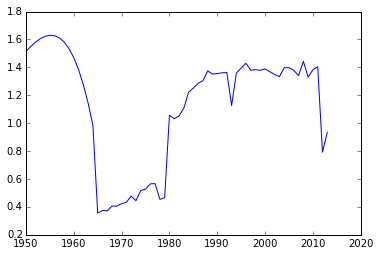

In [102]:
#biomass - scales together with population in the future - extrapolate before 1980 and after 2013
fuel='nrg'
end=2016
db='navg3'
R={}
for i in range(len(np.array(subgetter(country,fuel,db,'cons')['x'])[:end-1950])):
    R[np.array(subgetter(country,fuel,db,'cons')['x'])[:end-1950][i]]=\
    (np.array(subgetter(country,fuel,db,'cons')['y'])[:end-1950][i]-\
    subgetter('World','geo_other','navg3','cons')['y'][i]-\
    subgetter('World','solar','navg3','cons')['y'][i]-\
    subgetter('World','wind','navg3','cons')['y'][i]-\
    subgetter('World','nuclear','navg3','cons')['y'][i]-\
    subgetter('World','hydro','navg3','cons')['y'][i]-\
    subgetter('World','biofuels','navg3','cons')['y'][i]-\
    subgetter('World','oil','navg3','cons')['y'][i]-\
    subgetter('World','coal','navg3','cons')['y'][i]-\
    subgetter('World','gas','navg3','cons')['y'][i])/\
    getter('World','population')['y'][i]
plt.plot(R.keys(),R.values())

In [104]:
BIOMASS={}
#biomass primary
for i in range(151):
    scaler=np.mean(R.values()[40:61]) #take average of last 20 years
    print getter('World','population')['x'][i],'	',getter('World','population')['y'][i]*scaler
    BIOMASS[getter('World','population')['x'][i]]=getter('World','population')['y'][i]*scaler

1950 	3445.43438647
1951 	3509.64566047
1952 	3572.99618256
1953 	3636.52676686
1954 	3701.05860616
1955 	3767.18917959
1956 	3835.2867962
1957 	3905.49877964
1958 	3977.77875023
1959 	4051.93982523
1960 	4127.79375779
1961 	4205.31190165
1962 	4284.76025779
1963 	4366.75131055
1964 	4452.09124751
1965 	4541.28069619
1966 	4634.52154451
1967 	4731.43729876
1968 	4831.22586366
1969 	4932.76185043
1970 	5035.157225
1971 	5138.25784321
1972 	5242.09371543
1973 	5346.18603988
1974 	5450.02600442
1975 	5553.30941306
1976 	5655.77572122
1977 	5757.64864257
1978 	5859.7493699
1979 	5963.23466646
1980 	6068.98165345
1981 	6176.99987964
1982 	6287.12019568
1983 	6399.79275708
1984 	6515.51409901
1985 	6634.47656065
1986 	6756.93932246
1987 	6882.35401316
1988 	7009.07824717
1989 	7134.89944194
1990 	7258.16702724
1991 	7378.33399592
1992 	7495.63497448
1993 	7610.172271
1994 	7722.33056382
1995 	7832.46315682
1996 	7940.49365998
1997 	8046.44526312
1998 	8150.95773272
1999 	8254.86726675
2000 	

## Disaggregate geothermal/waste

In [105]:
#geothermal
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=6&pid=35&pdid=29,33,34,35,37,36,38,116,117&aid=12&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/Geothermal_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/Geothermal_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
df=pd.read_excel(url,skiprows=234)
df.columns=['cons']+range(1979,2013)
df=df.drop('cons',axis=1).drop(1979,axis=1)
df=df.loc[0]
df
#helper={}
#for i in df.loc[0].index:
#    helper[i]=df.loc[0][i]
#helper.update(interpolate(helper,range(1950,1980)+[2013],1,2))
#for i in helper:
#    print i,'	',helper[i]

1980    13.23608
1981    14.64216
1982    15.65587
1983    17.78310
1984    20.24650
1985    22.29823
1986    24.87795
1987    26.68046
1988    27.21208
1989    32.85544
1990    35.82027
1991    37.06144
1992    38.19696
1993    39.17257
1994    39.02645
1995    38.25226
1996    40.68968
1997    42.12710
1998    44.70592
1999    47.88301
2000    51.56316
2001    51.16460
2002    51.95431
2003    53.66523
2004    55.84918
2005    56.59095
2006    57.99743
2007    60.63261
2008    63.38798
2009    65.53966
2010    66.29721
2011    67.53235
2012    72.14343
Name: 0, dtype: float64

In [106]:
OTHER={}
#biomass+waste electricity
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=6&pid=38&pdid=29,33,34,35,37,36,38,116,117&aid=12&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/Biomass_and_Waste_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/Biomass_and_Waste_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
df=pd.read_excel(url,skiprows=234)
df.columns=['cons']+range(1979,2013)
df=df.drop('cons',axis=1).drop(1979,axis=1).drop(2012,axis=1)
#tidal+wave
if path ==0: url='http://www.eia.gov/cfapps/ipdbproject/XMLinclude_3.cfm?tid=6&pid=117&pdid=29,33,34,35,37,36,38,116,117&aid=12&cid=regions&syid=1980&eyid=2012&form=&defaultid=3&typeOfUnit=STDUNIT&unit=BKWH&products='
elif path==1: url='https://dl.dropboxusercontent.com/u/333992592/Set/db/Tide_and_Wave_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
else: url='E:/Dropbox (MIT)/Public/Set/db/Tide_and_Wave_Electricity_Net_Generation_(Billion_Kilowatthours).xls'
df2=pd.read_excel(url,skiprows=234)
df2.columns=['cons']+range(1979,2013)
df2=df2.drop('cons',axis=1).drop(1979,axis=1).drop(2012,axis=1)

df=df.add(df2)
helper={}
for i in df.loc[0].index[:-2]:
    helper[i]=df.loc[0][i]
helper.update(interpolate(helper,range(1950,2013),2,2,1,True))
for i in helper:
    print i,'	',helper[i]
    OTHER[i]=helper[i]

#http://www.eia.gov/oiaf/aeo/tablebrowser/aeo_query_server/?event=ehExcel.getFile&study=IEO2013&region=0-0&cases=Reference-d041117&table=37-IEO2013&yearFilter=0
url='E:/Dropbox (MIT)/Public/Set/db/IEO2013-World_net_other_renewable_electricity_generation_from_central_producers_by_region_and_country-Reference_case.xls'
do2=pd.read_html(url,skiprows=25)[0]
do2.columns=['cons']+range(2005,2042)
do2=do2.drop('cons',axis=1).drop(2041,axis=1)
for i in do2.columns[8:]:
    print i,'	',do2.loc[0][i]
    OTHER[i]=do2.loc[0][i]
    
#2040-2100 assumption: smooth stabilization
print 2050,'	',955
print 2070,'	',1000
OTHER[2050]=955
OTHER[2070]=1000

1950 	1.41858385106
1951 	1.55936426561
1952 	1.7141157437
1953 	1.88422477519
1954 	2.07121544533
1955 	2.27676308976
1956 	2.50270930462
1957 	2.75107844624
1958 	3.0240957683
1959 	3.32420735887
1960 	3.65410205609
1961 	4.01673553869
1962 	4.41535680726
1963 	4.85353729356
1964 	5.33520285863
1965 	5.86466896639
1966 	6.44667934785
1967 	7.08644850241
1968 	7.78970841695
1969 	8.56275992134
1970 	9.41252914049
1971 	10.3466295487
1972 	11.3734301823
1973 	12.5021306216
1974 	13.7428434144
1975 	15.1066846788
1976 	16.6058736974
1977 	18.2538423962
1978 	20.0653556865
1979 	22.0566437514
1980 	17.77536
1981 	17.97813
1982 	27.31462
1983 	28.30396
1984 	31.297
1985 	31.80522
1986 	34.41194
1987 	38.31173
1988 	40.52844
1989 	81.64375
1990 	94.76793
1991 	103.71395
1992 	114.30458
1993 	117.67959
1994 	124.03688
1995 	132.43986
1996 	134.78393
1997 	144.7105
1998 	150.06573
1999 	157.37568
2000 	164.79609
2001 	173.5434
2002 	188.55466
2003 	198.4216
2004 	211.62275
2005 	226.96777
20

In [107]:
GEO={}
#geo
for i in helper:
    print i,'	',max(0,subgetter('World','geo_other','navg3','cons')['y'][i-1950]-helper[i])
    GEO[i]=max(0,subgetter('World','geo_other','navg3','cons')['y'][i-1950]-helper[i])

1950 	0
1951 	0
1952 	0
1953 	0
1954 	0
1955 	0
1956 	0
1957 	0
1958 	0
1959 	0
1960 	0
1961 	0
1962 	0
1963 	0
1964 	0
1965 	0
1966 	0
1967 	0
1968 	0
1969 	0
1970 	1.22802246381
1971 	2.12105538129
1972 	2.0796767077
1973 	2.35530799147
1974 	3.01265981666
1975 	3.62003249333
1976 	3.78988039487
1977 	3.55699476686
1978 	2.30452293508
1979 	3.81296376088
1980 	12.1730816239
1981 	15.1701766195
1982 	14.4383913846
1983 	17.6889552077
1984 	20.0114163472
1985 	21.9302237159
1986 	25.1836003504
1987 	25.0005054097
1988 	25.6689465336
1989 	25.8884351975
1990 	27.5801582704
1991 	26.530275957
1992 	25.5060914517
1993 	26.9935835256
1994 	26.4360858979
1995 	23.9155056094
1996 	26.7948926293
1997 	26.9862251588
1998 	29.2001373401
1999 	33.6562718368
2000 	33.7333088936
2001 	27.6826818643
2002 	28.1828495706
2003 	31.8402760849
2004 	36.0994261545
2005 	41.3120221385
2006 	41.9892880117
2007 	44.7095410585
2008 	50.7791667569
2009 	47.0911621506
2010 	66.4096488345
2011 	89.9423596726
20

## EROEI

oil 
long term 10 doi:10.3390/su3102009 
1954 25
long term 10
exponential decay doi:10.3390/su3101810
gas 1970 25 1985 15 today 12

doi:10.3390/su3101796
oil and gas 30-20

dale
doi:10.3390/su3101972

coal
1950-80
1980-20
2000-15
oil
20-20

doi:10.3390/su3122433
Fuel Coal Oil Gas Ethanol Biodiesel Nuclear Solar PV Hydropower Wind 
EROEI 50–80 20–40 15–25 1–1.5 1.5–3 5–15 8–10 20–40 15–25

solar 10
wind 80
http://pubs.rsc.org/en/content/articlehtml/2013/ee/c3ee41973h

doi:10.1016/j.renene.2009.01.012
wind 20-25
geothermal 5-10
pv 3-10

doi:10.1016/j.enpol.2013.05.049
recomfirms, suggests higher for fossils

## Emissions intensities

In [576]:
for i in range(len(subgetter('World','coal','navg3','emi')['y'])):
    print subgetter('World','coal','navg3','emi')['x'][i],'	',\
    np.array(subgetter('World','coal','navg3','emi')['y'])[i]/\
    np.array(subgetter('World','coal','navg3','cons')['y'])[i]

1950 	0.340498710232
1951 	0.340498710232
1952 	0.340498710232
1953 	0.340498710232
1954 	0.340498710232
1955 	0.340498710232
1956 	0.340498710232
1957 	0.340498710232
1958 	0.340498710232
1959 	0.340498710232
1960 	0.340498710232
1961 	0.340498710232
1962 	0.340498710232
1963 	0.340498710232
1964 	0.340498710232
1965 	0.340498710232
1966 	0.340498710232
1967 	0.340498710232
1968 	0.340498710232
1969 	0.340498710232
1970 	0.340498710232
1971 	0.340498710232
1972 	0.340498710232
1973 	0.340498710232
1974 	0.340498710232
1975 	0.340498710232
1976 	0.340498710232
1977 	0.340498710232
1978 	0.340498710232
1979 	0.340498710232
1980 	0.329427843448
1981 	0.329818758645
1982 	0.329695279112
1983 	0.329650715022
1984 	0.329689069138
1985 	0.329670200678
1986 	0.329730925824
1987 	0.329735383363
1988 	0.329774363759
1989 	0.329890871727
1990 	0.329960672103
1991 	0.330160152097
1992 	0.33024938449
1993 	0.330014172379
1994 	0.330149203185
1995 	0.330451777745
1996 	0.330053033332
1997 	0.330349

## Renewable split

Calculate historical renewable energy splits, for model calibration.

In [577]:
#last 10 years
print np.array(subgetter('World','solar','navg3','cons')['y'][::-1][0:10])/np.array(subgetter('World','wind','navg3','cons')['y'][::-1][0:10])
print np.array(subgetter('World','geo_other','navg3','cons')['y'][::-1][0:10])/np.array(subgetter('World','wind','navg3','cons')['y'][::-1][0:10])


[ 0.19867084  0.18023043  0.13582313  0.088762    0.06872731  0.05109076
  0.03946972  0.0376517   0.03521466  0.03037571]
[ 0.76608459  0.85803305  0.94182216  1.07491934  1.19827877  1.44296392
  1.76990169  2.12774592  2.57201077  2.89560594]


## Population

In [545]:
for i in range(len(getter('World','population')['x'])):
    print getter('World','population')['x'][i],'	',getter('World','population')['y'][i]

1950 	2525.779
1951 	2572.851
1952 	2619.292
1953 	2665.865
1954 	2713.172
1955 	2761.651
1956 	2811.572
1957 	2863.043
1958 	2916.03
1959 	2970.396
1960 	3026.003
1961 	3082.83
1962 	3141.072
1963 	3201.178
1964 	3263.739
1965 	3329.122
1966 	3397.475
1967 	3468.522
1968 	3541.675
1969 	3616.109
1970 	3691.173
1971 	3766.754
1972 	3842.874
1973 	3919.182
1974 	3995.305
1975 	4071.02
1976 	4146.136
1977 	4220.817
1978 	4295.665
1979 	4371.528
1980 	4449.049
1981 	4528.235
1982 	4608.962
1983 	4691.56
1984 	4776.393
1985 	4863.602
1986 	4953.377
1987 	5045.316
1988 	5138.215
1989 	5230.452
1990 	5320.817
1991 	5408.909
1992 	5494.9
1993 	5578.865
1994 	5661.086
1995 	5741.822
1996 	5821.017
1997 	5898.688
1998 	5975.304
1999 	6051.478
2000 	6127.7
2001 	6204.147
2002 	6280.854
2003 	6357.992
2004 	6435.706
2005 	6514.095
2006 	6593.228
2007 	6673.106
2008 	6753.649
2009 	6834.722
2010 	6916.183
2011 	6997.999
2012 	7080.072
2013 	7162.119
2014 	7243.784
2015 	7324.782
2016 	7404.977
201

#Demand

In [133]:
TOTAL={}
for i in range(2013-1950):
    a=OIL[i+1950]+COAL[i+1950]+GAS[i+1950]+HYDRO[i+1950]+NUCLEAR[i+1950]+SOLAR[i+1950]+WIND[i+1950]+\
        BIOMASS[i+1950]+BIOFUELS[i+1950]+GEO[i+1950]+OTHER[i+1950]
    print i+1950,'	',a
    TOTAL[i+1950]=a

1950 	24081.7056429
1951 	25006.5606124
1952 	25984.9130255
1953 	27022.4998886
1954 	28125.5942159
1955 	29301.1093298
1956 	30556.704338
1957 	31900.8955224
1958 	33343.1615535
1959 	34894.0212054
1960 	36565.1006754
1961 	38369.0641405
1962 	40319.2744584
1963 	42429.0179189
1964 	44710.0471329
1965 	47146.6830723
1966 	49492.9184914
1967 	51305.1709622
1968 	54114.6729487
1969 	57543.2032769
1970 	60919.6354828
1971 	63192.3257998
1972 	66300.7047689
1973 	70014.1671683
1974 	70069.9035773
1975 	70391.4399122
1976 	73990.275882
1977 	76610.7566548
1978 	79424.9309345
1979 	81941.1502128
1980 	81421.3550829
1981 	80980.4535966
1982 	80720.3043768
1983 	81549.7716477
1984 	85131.5697331
1985 	87418.1025238
1986 	89318.5140913
1987 	92137.2218599
1988 	95268.6241281
1989 	97192.3783643
1990 	98137.7674594
1991 	98533.9332841
1992 	98763.0668498
1993 	99579.6158505
1994 	100891.202367
1995 	103170.226816
1996 	105742.240094
1997 	107015.565915
1998 	107584.634051
1999 	109675.854508
20

###Per capita power demand

2013-2100 assumption:
Societal power intensity peaks the end of the century due to two mechanisms: A reduction effect - use of higher energy efficient appliances (modeled sepparately through the energy efficiency variable) and changing social behavior of reducing real consumption in developed countries, An increase effect - with the expected increase of GDP and quality of life in developing countries - stronger than the other in this BAU scenario, this will lead to a significant increase in per capita power needs. This is a very conservative estimate, with 10 W/person

Save demand input for the BAU case.

In [143]:
for i in range(2013-1950):
    print getter('World','population')['x'][i],'	',\
    TOTAL[i+1950]/(getter('World','population')['y'][i]*8760)*1000000
print 2020,'	',2600
print 2030,'	',2730
print 2050,'	',2840
print 2070,'	',2880
print 2100,'	',2900

1950 	1088.39813601
1951 	1109.52021975
1952 	1132.48705082
1953 	1157.13296107
1954 	1183.36923395
1955 	1211.18689301
1956 	1240.66118803
1957 	1271.95251346
1958 	1305.30103634
1959 	1341.01168802
1960 	1379.40981903
1961 	1420.782253
1962 	1465.31403981
1963 	1513.03526271
1964 	1563.8158134
1965 	1616.6549158
1966 	1662.96338902
1967 	1688.54476807
1968 	1744.22387173
1969 	1816.55442952
1970 	1884.03423194
1971 	1915.1066998
1972 	1969.50865518
1973 	2039.32474597
1974 	2002.0617801
1975 	1973.84255086
1976 	2037.1687097
1977 	2071.99700107
1978 	2110.67970564
1979 	2139.75813065
1980 	2089.13752979
1981 	2041.48945845
1982 	1999.28891112
1983 	1984.27275
1984 	2034.63486421
1985 	2051.81991617
1986 	2058.42951338
1987 	2084.69552767
1988 	2116.57427983
1989 	2121.23548046
1990 	2105.49272617
1991 	2079.56279169
1992 	2051.77941359
1993 	2037.60730112
1994 	2034.46132847
1995 	2051.16479622
1996 	2073.69811396
1997 	2071.03491541
1998 	2055.35164723
1999 	2068.92840319
2000 	2097

###IPCC AR5 All prediction scenarios

In this part we do an informatory comparison of the per capita power demand of <i>ALL</i> scenarios in the IPCC AR5 database.

In [144]:
df=pd.read_excel('E:/Dropbox (MIT)/Public/Set/db/iamc_db.xlsx')

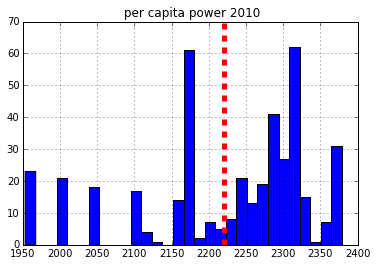

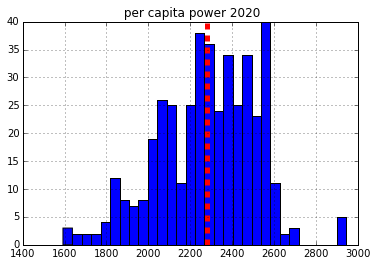

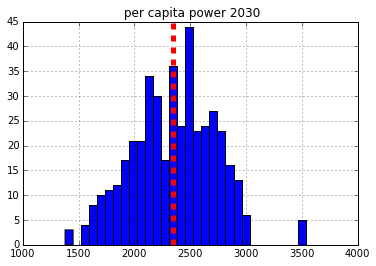

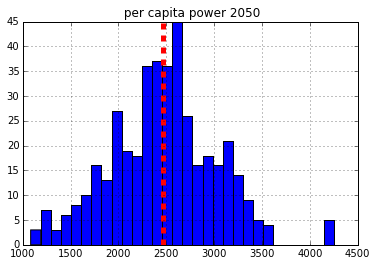

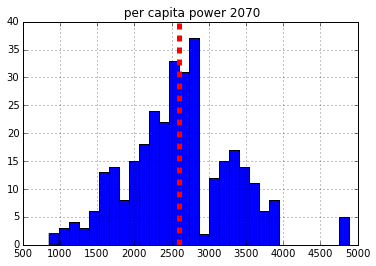

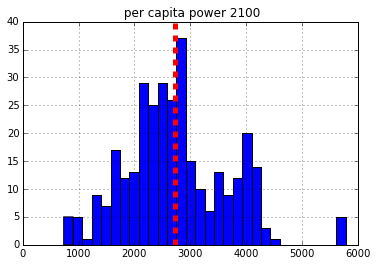

In [145]:
for year in [2010,2020,2030,2050,2070,2100]:
    h=df[year]*EJ_to_TWh/getter('World','population')['y'][year-1950]/8760*1000000
    h.hist(bins=30)
    plt.title(" per capita power "+repr(year))
    plt.axvline(h.mean(), color='r', linestyle='dashed', linewidth=5)
    plt.show()

Plot all of the results superimposed on one histogram.

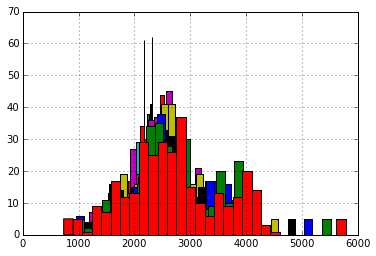

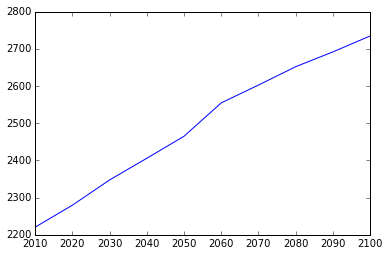

In [146]:
me=[]
x=[2010,2020,2030,2040,2050,2060,2070,2080,2090,2100]
for year in x:
    h=df[year]*EJ_to_TWh/getter('World','population')['y'][year-1950]/8760*1000000
    h.hist(bins=30)
    me.append(h.mean())
plt.figure()
plt.plot(x,me)

Save demand input for the IPCC AR5 case.

In [157]:
for i in range(2013-1950):
    print getter('World','population')['x'][i],'	',\
    TOTAL[i+1950]/(getter('World','population')['y'][i]*8760)*1000000
for i in range(3,len(x)):
    print x[i],'	',me[i]

1950 	1088.39813601
1951 	1109.52021975
1952 	1132.48705082
1953 	1157.13296107
1954 	1183.36923395
1955 	1211.18689301
1956 	1240.66118803
1957 	1271.95251346
1958 	1305.30103634
1959 	1341.01168802
1960 	1379.40981903
1961 	1420.782253
1962 	1465.31403981
1963 	1513.03526271
1964 	1563.8158134
1965 	1616.6549158
1966 	1662.96338902
1967 	1688.54476807
1968 	1744.22387173
1969 	1816.55442952
1970 	1884.03423194
1971 	1915.1066998
1972 	1969.50865518
1973 	2039.32474597
1974 	2002.0617801
1975 	1973.84255086
1976 	2037.1687097
1977 	2071.99700107
1978 	2110.67970564
1979 	2139.75813065
1980 	2089.13752979
1981 	2041.48945845
1982 	1999.28891112
1983 	1984.27275
1984 	2034.63486421
1985 	2051.81991617
1986 	2058.42951338
1987 	2084.69552767
1988 	2116.57427983
1989 	2121.23548046
1990 	2105.49272617
1991 	2079.56279169
1992 	2051.77941359
1993 	2037.60730112
1994 	2034.46132847
1995 	2051.16479622
1996 	2073.69811396
1997 	2071.03491541
1998 	2055.35164723
1999 	2068.92840319
2000 	2097

#Emissions
Since IPCC RCP2.6 reports direct emissions from fossils + industry, cement and waste, we need to esmitate non-fossils. For this, we use the links in the <a href="http://unfccc.int/ghg_data/items/3800.php" target="_blank">UNFCCC emissions databank</a>. This part is only informatory, as later we have dropped including external emissions into the SET 2.0 model upon gaining a better understanding of the IPCC AR5 report.  

## Emissions for each fossil based on intensities

In [166]:
#extrapolate emissions intensities
for country in {'World'}:
    for fuel in hubbertfuels:
        for year in range(1950,2101):
            if (year<1965):
                #get long term emissions intensity
                ei=np.mean(fracgetter(country,fuel,'navg2','emi','cons')['y'][3:13]) #eliminate potential endpoint data rifts
                data[country][year]['energy'][fuel]['emi']['navg3']=data[country][year]['energy'][fuel]['cons']['navg3']*ei
            if (year>2013):
                #get long term emissions intensity
                ei=np.mean(fracgetter(country,fuel,'navg2','emi','cons')['y'][-13:-3]) #eliminate potential endpoint data rifts
                data[country][year]['energy'][fuel]['emi']['navg3']=data[country][year]['energy'][fuel]['cons']['navg3']*ei
            #rest of the years should be already defined

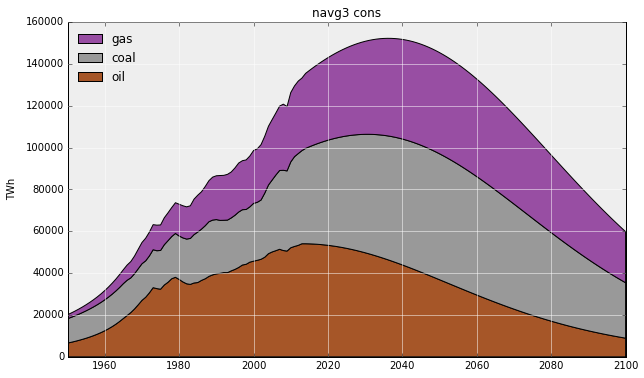

In [167]:
stackplotter('World','navg3','cons',hubbertfuels,[1950,2100])

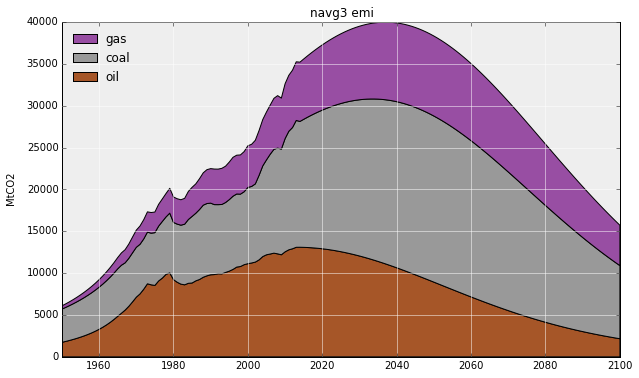

In [168]:
stackplotter('World','navg3','emi',hubbertfuels,[1950,2100])

## Cumulative emissions

In [169]:
for country in {'World'}:
    data[country][1950]['cumulative_emissions']=663000 #cumulative CO2 emissions until 1950 in GtCO2
    for year in range(1951,2101):
        data[country][year]['cumulative_emissions']=data[country][year-1]['cumulative_emissions']
        for fuel in hubbertfuels:
            data[country][year]['cumulative_emissions']+=data[country][year]['energy'][fuel]['emi']['navg3']

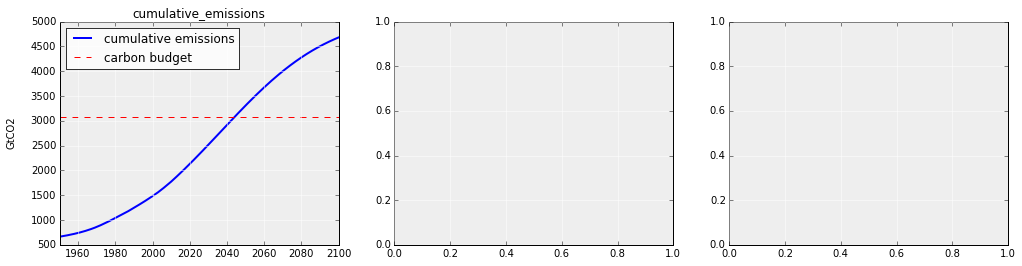

In [170]:
plotter('World','cumulative_emissions',limits=[1950,2100])

In [177]:
#Carbon caps GtCO2 after 2012
cap=[510,990,1505]

Save unrestricted emissions for each fuel type.

Rate

In [292]:
RATE={}
fuel='coal'
for i in range(0,151):#63,151
    print subgetter('World',fuel,'navg3','emi')['x'][i],'	',subgetter('World',fuel,'navg3','emi')['y'][i]/1000
    RATE[subgetter('World',fuel,'navg3','emi')['x'][i]]=subgetter('World',fuel,'navg3','emi')['y'][i]/1000

1950 	3.96812596961
1951 	4.06098014416
1952 	4.15695963502
1953 	4.25600322059
1954 	4.35805705643
1955 	4.46307406237
1956 	4.57101328605
1957 	4.68183926036
1958 	4.79552136758
1959 	4.91203321911
1960 	5.03135205707
1961 	5.15345818159
1962 	5.27833440598
1963 	5.40596554063
1964 	5.53633790576
1965 	5.6694388721
1966 	5.73536378461
1967 	5.64676219753
1968 	5.73109107079
1969 	5.86239637836
1970 	5.959183101
1971 	5.9226930726
1972 	6.00556270756
1973 	6.17352189634
1974 	6.16607123235
1975 	6.30316309169
1976 	6.55176571875
1977 	6.76921086919
1978 	6.86500770242
1979 	7.13594234409
1980 	6.83761241693
1981 	6.94269662587
1982 	7.0454506975
1983 	7.2385811649
1984 	7.62104130249
1985 	7.955713196
1986 	8.07948636992
1987 	8.35974807832
1988 	8.61380092982
1989 	8.63926459161
1990 	8.55989818178
1991 	8.3573721902
1992 	8.25525072619
1993 	8.29034268703
1994 	8.35157062002
1995 	8.54612206625
1996 	8.74564130627
1997 	8.7323414353
1998 	8.64835179509
1999 	8.71757418434
2000 	9.11

In [293]:
fuel='gas'
for i in range(0,151):#63,151
    print subgetter('World',fuel,'navg3','emi')['x'][i],'	',subgetter('World',fuel,'navg3','emi')['y'][i]/1000
    RATE[subgetter('World',fuel,'navg3','emi')['x'][i]]+=subgetter('World',fuel,'navg3','emi')['y'][i]/1000

1950 	0.386408672702
1951 	0.419668946681
1952 	0.456007356259
1953 	0.495711717176
1954 	0.539089084462
1955 	0.586463576894
1956 	0.638172699608
1957 	0.694561740971
1958 	0.755975771913
1959 	0.822748754989
1960 	0.895189297531
1961 	0.973562685916
1962 	1.05806904925
1963 	1.14881785536
1964 	1.2457994692
1965 	1.34885521433
1966 	1.46789405654
1967 	1.57426130746
1968 	1.70930088568
1969 	1.88328836607
1970 	2.05000397407
1971 	2.1894690838
1972 	2.30110042546
1973 	2.42035811168
1974 	2.46958734198
1975 	2.4633550685
1976 	2.60306897371
1977 	2.6899058621
1978 	2.79850097051
1979 	2.96809794389
1980 	3.03912649677
1981 	3.03054447217
1982 	3.03561105642
1983 	3.09229654398
1984 	3.35536299898
1985 	3.47371583386
1986 	3.5088592732
1987 	3.68412762383
1988 	3.86318003749
1989 	4.04567912468
1990 	4.12243605307
1991 	4.24917755709
1992 	4.24457337327
1993 	4.31829092562
1994 	4.34176498094
1995 	4.4858250373
1996 	4.64603601813
1997 	4.63598865345
1998 	4.68509753989
1999 	4.797936

In [294]:
fuel='oil'
for i in range(0,151):#63,151
    print subgetter('World',fuel,'navg3','emi')['x'][i],'	',subgetter('World',fuel,'navg3','emi')['y'][i]/1000
    RATE[subgetter('World',fuel,'navg3','emi')['x'][i]]+=subgetter('World',fuel,'navg3','emi')['y'][i]/1000

1950 	1.72900663041
1951 	1.83505483761
1952 	1.94875969001
1953 	2.0710186409
1954 	2.20289627346
1955 	2.34565591759
1956 	2.50079383468
1957 	2.67007377624
1958 	2.85555786303
1959 	3.05962695353
1960 	3.2849797282
1961 	3.5345944653
1962 	3.81163109538
1963 	4.11924444682
1964 	4.46027473149
1965 	4.83678229033
1966 	5.20529336983
1967 	5.57935046744
1968 	6.03677707246
1969 	6.5659432283
1970 	7.12000874048
1971 	7.51638527219
1972 	8.073182493
1973 	8.72250056677
1974 	8.60155149315
1975 	8.52887611423
1976 	9.05688778245
1977 	9.40168405608
1978 	9.84932495519
1979 	10.0280017282
1980 	9.2197439325
1981 	8.90957414325
1982 	8.68115767787
1983 	8.60061779918
1984 	8.78088363491
1985 	8.81709897277
1986 	9.07168794674
1987 	9.23761989781
1988 	9.50346815662
1989 	9.67370918491
1990 	9.79926468107
1991 	9.82464176463
1992 	9.92314600752
1993 	9.90853342243
1994 	10.0802528592
1995 	10.2338620725
1996 	10.4422081829
1997 	10.7196213014
1998 	10.7852533584
1999 	11.0053710337
2000 	1

Cumulative

In [295]:
CUMU={}
fuel='gas'
a=0
for i in range(63,151):
    a+=subgetter('World',fuel,'navg3','emi')['y'][i]/1000
    print subgetter('World',fuel,'navg3','emi')['x'][i],'	',a
    CUMU[subgetter('World',fuel,'navg3','emi')['x'][i]]=a

2013 	7.00639141357
2014 	14.0894574589
2015 	21.2950623508
2016 	28.6218364284
2017 	36.0682418087
2018 	43.6325718078
2019 	51.312950803
2020 	59.1073345411
2021 	67.0135108968
2022 	75.0291010805
2023 	83.1515612958
2024 	91.3781848417
2025 	99.706104655
2026 	108.132296286
2027 	116.653581297
2028 	125.266631075
2029 	133.967971041
2030 	142.753985254
2031 	151.620921377
2032 	160.564896009
2033 	169.581900346
2034 	178.66780617
2035 	187.818372142
2036 	197.029250369
2037 	206.295993248
2038 	215.614060545
2039 	224.978826702
2040 	234.385588352
2041 	243.829572016
2042 	253.305941964
2043 	262.809808224
2044 	272.336234716
2045 	281.880247491
2046 	291.436843055
2047 	301.000996768
2048 	310.567671276
2049 	320.131824988
2050 	329.688420553
2051 	339.232433327
2052 	348.758859819
2053 	358.26272608
2054 	367.739096027
2055 	377.183079691
2056 	386.589841342
2057 	395.954607498
2058 	405.272674795
2059 	414.539417674
2060 	423.750295901
2061 	432.900861873
2062 	441.986767698
2063

In [296]:
fuel='coal'
a=0
for i in range(63,151):
    a+=subgetter('World',fuel,'navg3','emi')['y'][i]/1000
    print subgetter('World',fuel,'navg3','emi')['x'][i],'	',a
    CUMU[subgetter('World',fuel,'navg3','emi')['x'][i]]+=a

2013 	15.1537791691
2014 	30.1863886226
2015 	45.483115087
2016 	61.0410495818
2017 	76.856856464
2018 	92.9267670927
2019 	109.246574736
2020 	125.811630793
2021 	142.616842407
2022 	159.656671538
2023 	176.925135541
2024 	194.415809327
2025 	212.121829125
2026 	230.035897908
2027 	248.150292483
2028 	266.456872287
2029 	284.947089877
2030 	303.612003121
2031 	322.442289074
2032 	341.428259503
2033 	360.559878037
2034 	379.826778878
2035 	399.218287027
2036 	418.723439935
2037 	438.331010514
2038 	458.0295314
2039 	477.80732037
2040 	497.652506805
2041 	517.553059069
2042 	537.49681268
2043 	557.471499141
2044 	577.464775284
2045 	597.464252991
2046 	617.457529134
2047 	637.432215594
2048 	657.375969205
2049 	677.276521469
2050 	697.121707904
2051 	716.899496875
2052 	736.59801776
2053 	756.205588339
2054 	775.710741248
2055 	795.102249396
2056 	814.369150238
2057 	833.500768771
2058 	852.4867392
2059 	871.317025153
2060 	889.981938398
2061 	908.472155987
2062 	926.778735791
2063 	944

In [297]:
fuel='oil'
a=0
for i in range(63,151):
    a+=subgetter('World',fuel,'navg3','emi')['y'][i]/1000
    print subgetter('World',fuel,'navg3','emi')['x'][i],'	',a
    CUMU[subgetter('World',fuel,'navg3','emi')['x'][i]]+=a

2013 	13.0840151423
2014 	26.1723403694
2015 	39.2492599037
2016 	52.3071959756
2017 	65.3386097547
2018 	78.3360167265
2019 	91.2920018728
2020 	104.199234599
2021 	117.050483354
2022 	129.838629898
2023 	142.556683147
2024 	155.197792578
2025 	167.755261112
2026 	180.222557457
2027 	192.593327852
2028 	204.861407193
2029 	217.020829473
2030 	229.065837537
2031 	240.990892103
2032 	252.790680022
2033 	264.460121767
2034 	275.994378122
2035 	287.388856059
2036 	298.639213797
2037 	309.741365029
2038 	320.691482321
2039 	331.485999687
2040 	342.121614334
2041 	352.595287599
2042 	362.904245091
2043 	373.04597605
2044 	383.018231942
2045 	392.819024331
2046 	402.446622034
2047 	411.899547606
2048 	421.176573187
2049 	430.276715729
2050 	439.199231677
2051 	447.943611102
2052 	456.509571358
2053 	464.897050296
2054 	473.106199072
2055 	481.137374602
2056 	488.991131704
2057 	496.668214969
2058 	504.169550409
2059 	511.496236921
2060 	518.649537611
2061 	525.630871015
2062 	532.441802262
2

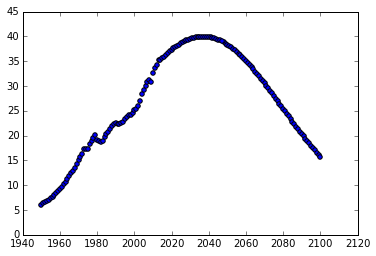

In [304]:
plt.scatter(RATE.keys(),RATE.values())

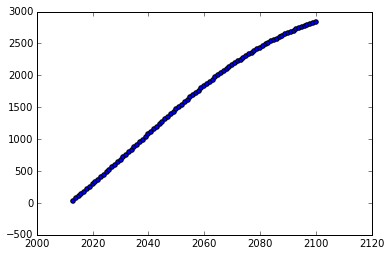

In [303]:
plt.scatter(CUMU.keys(),CUMU.values())

Processing GHG emissions for industry, cement (combined under industrial processes), fugitive emissions from fossil fuels and waste from various sources.

##UNSTATS - UNSD sectoral data

In [317]:
#http://unstats.un.org/unsd/ENVIRONMENT/air_greenhouse_emissions%20by%20sector.htm
#alternative
df=pd.read_excel('http://unstats.un.org/unsd/ENVIRONMENT/excel_file_tables/2010/GHGbySector.xls',skiprows=16).\
        drop('Unnamed: 0',axis=1).set_index('Country')[1:].dropna()

In [321]:
df.columns

Index([u'latest year available', u'Total GHG emissions ', u'GHG from Energy', u'GHG from Energy \nof which: from Transport', u'GHG from Industrial Processes', u'GHG from Agriculture', u'GHG from Waste'], dtype='object')

###Emissions in last tear available

In [337]:
np.nansum(df[u'Total GHG emissions '])/1000

30.824182848924064

In [336]:
np.nansum(df[u'GHG from Industrial Processes'].replace(['...'],[np.NaN]))/1000

2.1053617220836487

In [338]:
np.nansum(df[u'GHG from Waste'].replace(['...'],[np.NaN]))/1000

1.0570608173388363

In [340]:
np.mean(df[u'latest year available'])

1998.6820809248554

In [464]:
#comparison
RATE[1999]

24.520882036112482

##UN MDG from CDIAC

In [346]:
df1=pd.read_html('http://mdgs.un.org/unsd/mdg/SeriesDetail.aspx?srid=749&crid=')
df1=df1[2][1:].set_index(0)[1:]
df1.index.names=['Country']
df1.columns=range(1990,2011)

In [462]:
#fossil only
np.nansum(df1[2010])/1e6

31.350455

In [463]:
#comparison
RATE[2010]

32.618889892209687

##UN MDG from UNFCCC

In [358]:
df2=pd.read_html('http://mdgs.un.org/unsd/mdg/SeriesDetail.aspx?srid=750&crid=')
df2=df2[2][1:].set_index(0)[1:]
df2.index.names=['Country']
df2.columns=range(1990,2012)

In [369]:
#fossil only
np.nansum(df2[1990])/1e6

14.987003099999999

In [370]:
#comparison
RATE[1990]

22.481598915928974

##CDIAC direct

###Carbon

In [375]:
#http://cdiac.esd.ornl.gov/trends/trends.htm
df3=pd.read_csv('http://cdiac.ornl.gov/ftp/ndp030/CSV-FILES/global.1751_2008.csv').set_index('Year"')

In [385]:
df3.loc[u'1999']

Total carbon emissions from fossil-fuels (million metric tons of C)    6584
carbon emissions from gas fuel consumption                      1270
carbon emissions from liquid fuel consumption                   2703
carbon emissions from solid fuel consumption                    2356
carbon emissions from cement production                          217
carbon emissions from gas flaring                                 37
Per capita carbon emissions (metric tons of carbon; after 1949 only)    1.09
Name: 1999, dtype: object

In [465]:
#convert to co2
a=np.array(df3.loc[u'1999']).astype(float)*44/12
a

array([  2.41413333e+04,   4.65666667e+03,   9.91100000e+03,
         8.63866667e+03,   7.95666667e+02,   1.35666667e+02,
         3.99666667e+00])

In [466]:
print 'total',a[0]/1000,RATE[1999]
print 'cement',a[4]/1000
print 'gas flaring',a[5]/1000

total 24.1413333333 24.5208820361
cement 0.795666666667
gas flaring 0.135666666667


###Methane

In [414]:
#http://www.epa.gov/cleanenergy/energy-resources/calculator.html#results
ch4_co2=25

In [399]:
#http://cdiac.esd.ornl.gov/trends/meth/ch4.htm
df4=pd.read_csv('http://cdiac.esd.ornl.gov/ftp/trends/ch4_emis/ch4.dat',skiprows=17)

In [404]:
df4.loc[df4.index[0]]

Series([], name: Year     Gas Flaring      Gas Supply     Coal Mining Biomass Burning       Livestock       Rice etc.       Landfills           Total, dtype: float64)

In [448]:
np.genfromtxt(StringIO.StringIO(df4.loc[df4.index[135]].name.replace(' ',',')), delimiter=",")*ch4_co2/1000

array([ 49.85  ,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
         0.38  ,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
         0.45  ,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
         1.1575,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
         0.935 ,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,   2.8275,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,   2.52  ,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,   1.0075,      nan,
            nan,      nan,      nan,      nan,      nan,      

###Summarize

In [ ]:
#CDIAC 1994
#total fossil #MY
23.0413333333 22.7735884601
#waste
1.0075
#gas flaring+supply
0.38+0.45+0.139333333333
#cement
0.682

#CDIAC 2008
#total fossil #MY
32.0796666667 31.2032481474
#cement 
1.41533333333
#gas flaring 
0.267666666667

#CDIAC 1999
#total fossil #MY
24.1413333333 24.5208820361
#cement 
0.795666666667
#gas flaring 
0.135666666667

#UN MDG CDIAC 2010
#db        #MY
31.350455  32.618889892209687

#UNSTATS latest year available (mean 1999)
#total
30.824182848924064
#industrial processes
2.1053617220836487
#waste
1.0570608173388363
#MY 1999
24.520882036112482

In [472]:
4.75*RATE[2012]/RATE[2008]

5.2135790889229812

Fossil data is in almost perfect alignment.  
Waste seems to be constant at around 1.05.  
Industrial processes add up to 2.1 (8.6% MY total), out of which 0.8 (3.25%) is cement in 1999.  
By 2008 cement increased to 1.41 (4.5% of MY total).  
In 1994 cement was 0.68 (3% of MY total).  

We will scale up the industrial processes' emissions of 2.1 in 1999 by the same rate as cement increased until 2008, the latest available data point. This yields 2.1*1.41/0.8 = 3.7. Combined with waste, this leads to a total of non-fossil and non-agricultural emissions of 3.7+1.05 = 4.75 GtCO2e in 2008.  

We will scale this value together with fossil emissions and cast if forward to 2012. This yields 5.21 GtCO2e in 2012.  

Since all kinds of emissions must end by the end of the century, we will yearly linearly reduce this to 0 between 2013 and 2100.
Even with the introduction of new technologies, this is [plausible](http://blogs.ei.columbia.edu/2012/05/09/emissions-from-the-cement-industry/) since the cement production is growing by 2.5% annually, and is expected to rise from 2.55 billion tons in 2006 to 3.7-4.4 billion tons by 2050.

This would be the external emissions data to be pasted into AnyLogic, until 2100, linearly decaying.

Aftere much debate about the definition of <i>industrial</i> emissions, we decided to not include the above into the final model.

In [476]:
a=0
for i in range(2013,2101):
    print i,'	',5.21*(2100-i)/(2100-2013)
    a+=5.21*(2100-i)/(2100-2013)

2013 	5.21
2014 	5.15011494253
2015 	5.09022988506
2016 	5.03034482759
2017 	4.97045977011
2018 	4.91057471264
2019 	4.85068965517
2020 	4.7908045977
2021 	4.73091954023
2022 	4.67103448276
2023 	4.61114942529
2024 	4.55126436782
2025 	4.49137931034
2026 	4.43149425287
2027 	4.3716091954
2028 	4.31172413793
2029 	4.25183908046
2030 	4.19195402299
2031 	4.13206896552
2032 	4.07218390805
2033 	4.01229885057
2034 	3.9524137931
2035 	3.89252873563
2036 	3.83264367816
2037 	3.77275862069
2038 	3.71287356322
2039 	3.65298850575
2040 	3.59310344828
2041 	3.5332183908
2042 	3.47333333333
2043 	3.41344827586
2044 	3.35356321839
2045 	3.29367816092
2046 	3.23379310345
2047 	3.17390804598
2048 	3.11402298851
2049 	3.05413793103
2050 	2.99425287356
2051 	2.93436781609
2052 	2.87448275862
2053 	2.81459770115
2054 	2.75471264368
2055 	2.69482758621
2056 	2.63494252874
2057 	2.57505747126
2058 	2.51517241379
2059 	2.45528735632
2060 	2.39540229885
2061 	2.33551724138
2062 	2.27563218391
2063 	2.21574

<p><br><p>We would like to express our gratitude to all of the developers of the libraries used and especially to the affiliates of <i>EIA, BP and World Bank</i> for their great database and openly accesible data. The data manipulation algorithms are open sourced and freely reproducible under an <a href="http://opensource.org/licenses/MIT" target="_blank">MIT license</a>.</p>
<br>
<p><a href="http://www.csaladen.es" target="_blank">Dénes Csala</a>&nbsp;&nbsp;|&nbsp;&nbsp;2015</p>

<br>
<a href="http://www.csaladen.es" target="_blank">Dénes Csala</a>&nbsp;&nbsp;|&nbsp;&nbsp;2015